# Recipe Recommender based on NLP

**Recommender Systems** are employed everywhere in most of the apps that we use. It automatically suggests us the relevant options, topics, music, food, movies to help us make better choices. When it comes to implementing NLP in recommender, it utilizes the similarity of the content. In this project we are using NLP content based filtering to suggest users with top recipes relevant to what data they enter - be it recipe name, ingredient list.  

In our project we only have text data of recipes, we don't have metadata like cusine type, difficulty level, cook-time, seasonal data or user-generated content (e.g., comments, votes and reviews).

In [2]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

import nltk
from wordcloud import WordCloud
from scipy.sparse import csr_matrix

from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
from gensim import similarities

from gensim.models.coherencemodel import CoherenceModel

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### Loading Data

In [3]:
file_path1 = "recipes_raw_nosource_ar.json"
allrecipes = pd.read_json(file_path1)
file_path2 = "recipes_raw_nosource_epi.json"
epicurious = pd.read_json(file_path2)
file_path3 = "recipes_raw_nosource_fn.json"
foodnetwork = pd.read_json(file_path3)

In [4]:
# reding from first file
allrecipes.head()

,rmK12Uau.ntP510KeImX506H6Mr6jTu,5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,clyYQv.CplpwJtjNaFGhx0VilNYqRxu,BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,kq.naD.8G19M4UU9dVvJgHtpfo.l/eC,lYrgWNn00EXblOupzM3tL0jGr9O0CB2,Fu0DgGYFUGwc0BBlN6r20o/ihOVs5bO,MBRNtqELRRuv8zJH4k7Aba2bmIc2A3C,ZPyPoMiNvgAfrKcRpH9FEYV/XsPZBsW,...,uHHb42/tuIKsmN5U6l9AD.FdVpSFxs6,IPAeN3L6rm2oughJpUhbG038k.ACJ0K,3UIhlTQFH5jyIaHN8zeKlK5V.94Kjwu,PdBxkE2gnI/.ynokkp1Hu1KLGZnGdei,SB46Udqc5Svsi70S1qRmRLv5tlg8Oca,gehEOcDPtU3SmNSXrwWwWD4ulPpUdMO,VRAsyF.1xMBYqAVKX1biyIORH6N6qzy,Lf8/u.0k2029QMSQFrHS4gRsvKOQFUG,ay.AqX/9ysBtWHcnHoDeGAyJ5Orla8e,2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
title,Slow Cooker Chicken and Dumplings,Awesome Slow Cooker Pot Roast,Brown Sugar Meatloaf,Best Chocolate Chip Cookies,Homemade Mac and Cheese Casserole,Banana Banana Bread,Chef John's Fisherman's Pie,Mom's Zucchini Bread,The Best Rolled Sugar Cookies,Singapore Chili Crabs,...,Citrus Creme Brulee,Honey Nutty Granola,Salmon en Croute,Homemade Blender Butter,Gluten Free Chicken Noodle Soup,Thai-Indian Veggie Soup,Coconut Milk-Free Panang Curry Chicken,Cooked Cold Salad,Easy Eggnog Creme Brulee,Super Power Stovetop Granola
ingredients,"[4 skinless, boneless chicken breast halves AD...",[2 (10.75 ounce) cans condensed cream of mushr...,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...","[1 cup butter, softened ADVERTISEMENT, 1 cup w...",[8 ounces whole wheat rotini pasta ADVERTISEME...,"[2 cups all-purpose flour ADVERTISEMENT, 1 tea...","[For potato crust: ADVERTISEMENT, 3 russet pot...","[3 cups all-purpose flour ADVERTISEMENT, 1 tea...","[1 1/2 cups butter, softened ADVERTISEMENT, 2 ...","[Sauce: ADVERTISEMENT, 1/2 cup ketchup ADVERTI...",...,"[2 oranges, juiced ADVERTISEMENT, lemon, juice...","[3 cups rolled oats ADVERTISEMENT, 1 1/2 cups ...","[1 cup watercress, or as desired ADVERTISEMENT...","[2 pints heavy whipping cream ADVERTISEMENT, s...",[1/2 (12 ounce) box Barilla® Gluten Free Elbow...,"[2 teaspoons olive oil ADVERTISEMENT, 1/4 cup ...","[2 cups light cream ADVERTISEMENT, 1/4 teaspoo...","[3 tablespoons bacon grease ADVERTISEMENT, 2 c...","[4 egg yolks ADVERTISEMENT, 1 tablespoon white...","[1/4 cup canola oil ADVERTISEMENT, 3 cups quic..."
instructions,"Place the chicken, butter, soup, and onion in ...","In a slow cooker, mix cream of mushroom soup, ...",Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F. Line a 2-quart ...,Preheat oven to 350 degrees F (175 degrees C)....,Bring a large saucepan of salted water and to ...,Grease and flour two 8 x 4 inch pans. Preheat ...,"In a large bowl, cream together butter and sug...","Whisk ketchup, chicken broth, egg, soy sauce, ...",...,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 375 degrees F (190 degrees C)....,Pour cream into a blender. Cover and blend unt...,Saute onions in olive oil over medium heat unt...,Heat oil in a large pot over medium heat. Add ...,Heat cream and coconut extract in a skillet or...,Heat bacon grease in a skillet over medium-hig...,Preheat oven to 350 degrees F (175 degrees C)....,Heat 1/4 cup canola oil in large skillet over ...
picture_link,55lznCYBbs2mT8BTx6BTkLhynGHzM.S,QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,YCnbhplMgiraW4rUXcybgSEZinSgljm,jRnWGDXDdyOg3rta4/HVAR2rD19XubC,aUca10AaD8T2yYvcLOgH/UJlR5/OhOe,YdgEVyLVffZgh9NZPN3Eqj6MaX8KdzK,UrgvDGu4roLiho160fTVIwCUrGZna8i,OFp6yXFwzlrkMQ5STffYPllxQvMVLUS,...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cWEzUSv9Ozr3b4MxNVCqJYgTjIS.kHm,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa


In [5]:
# reding from second file
epicurious.head()

,05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,FHQAJvovVtPyKWlzgFEHgSUJsCM2Tjq,Jt7RKsNPY7/1QrOjuPEomP/s6mD2AvO,1rBWKEw7vZjXA97NmHGS3VHq1iVX9c.,agTMHTysNlAOyMM3zQlXVu4qbJrLmqa,Y..dFCvcwNW4gdogZ3DqLUETR2x.uA2,...,VUfq3eH/dAQ2DDaa83Dp1x8Hdm7vCv6,g0paH27SGSQ/aN.el/wwu/nxX7RnmIi,ARu0StlTkUfsW5DKqtmupUEJyF8Rdh6,cbKR3qnmLFpQTNxrF7qYhy1kEaXJ6w.,K0hj3K9zJA3.WqLpYyijMgCYZ7dSQOu,lgygAJbdT1RNgrOYYveXtW4Ze9GtcZK,EgIvlp1EfF4qTsnSI3v7ViZF1b3f2qC,aCaoP.P8A1h6ALQmBnw3ypvYfRt/zZe,fGxd/ZNUQcXxxqaVgEtMJmsNKLbugAe,qznqHiNpq0AB1AYn002A2HvaEFnN0lq
ingredients,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...","[18 fresh chestnuts, 2 1/2 pounds veal stew me...","[2 tablespoons unsalted butter, softened, 4 or...","[3/4 pound Stilton, crumbled (about 3 cups) an...","[2 cups (about 9 1/2 ounces) whole almonds, to...","[2 tablespoons butter, 2 tablespoons flour, 1 ...","[1/2 teaspoon finely grated fresh lemon zest, ...","[2 garlic cloves, finely chopped, 2 teaspoons ...","[2 tablespoons (1/4 stick) butter, 1/4 cup oli...","[1 recipe pâte à chou, About 1 cup pastry crea...",...,"[1 lemon, 4 pounds littleneck clams, 1 garlic ...","[2 large egg yolks, 2 tablespoons apple cider,...","[1 package (3.4 ounces) vanilla pudding, Veget...","[2 cups sugar, 2/3 cup plus 1/4 cup water, 1/2...","[1/2 cup sugar, 1/2 teaspoon each: ground clov...","[5 cups (about) canned beef broth, 1 cup lenti...","[1/2 teaspoon turmeric, 2 cups water, 3/4 poun...","[1 medium jalapeño, thinly sliced, 2 garlic cl...","[1 1/2 cups almond flour or almond meal, 1/2 c...","[1 1/2 pounds plum tomatoes, coarsely chopped ..."
picture_link,None,None,3xjktRst3I5lDZ2Z5kTOtqQyzZFFN9u,None,None,cvv25l1DWlsVF/1TPnkpMI8tLdIMGem,g2GPWB.pUjfUxA36R/G8tLTDbtlFtGS,None,None,/CJLlvthN5lJcsScHGU7CKrxbGS5ElW,...,J87nuNT0Lj8f1NkwCIDDKZvQPUyO39W,None,2z4akFs8e/HKRv2Ku6imTYbYXQEBU.a,None,None,None,16DvpBiksnvbWPCSdZUcPY3oFvgo0py,m6IALrfAOr5KDVpqKcvUNpa7VermSIq,wq1Cqtl16W8QpuFaXrDdB2kGsUn9Ku6,DIZQ16bhYvwR7yKtaNOQf3XkgD0vbCK
instructions,"Beat the egg whites until stiff, gradually add...",Preheat oven to 400°F. Using small sharp knife...,Preheat the oven to 350°F. Spread the softened...,"In a food processor blend the Stilton, the cre...",Position rack in center of oven and preheat to...,Melt the butter in a heavy-bottomed saucepan. ...,"Whisk together zest, lemon juice, and salt and...",Cook garlic and ginger in oil in a 1- to 1 1/2...,Preheat oven to 350°F. Melt 2 tablespoons butt...,Make cream puffs Preheat oven to 425°F. and bu...,...,Prepare a grill for medium-high heat. Cut lemo...,For crust: Whisk egg yolks and apple cider in ...,Make pudding as directed on package. Heat oven...,Stir sugar and 2/3 cup water in heavy medium s...,1. Preheat the oven to 350°:F. Combine the sug...,Bring 4 cups broth and lentils to boil in larg...,"Stir together turmeric, 1 1/2 cups water, and ...","Marinate and cook the steak: Combine jalapeño,...",Make the cakes: Preheat oven to 350°F. Line th...,"Preheat oven to 400°F. Combine plum tomatoes, ..."
title,Christmas Eggnog,"Veal, Carrot and Chestnut Ragoût",Caramelized Bread Pudding with Chocolate and C...,Sherried Stilton and Green Peppercorn Spread,Almond-Chocolate Macaroons,White Sauce or Bechamel Sauce,"Grilled Whole Mackerel with Lemon, Oregano, an...",Apricot Chutney,Garlic Croutons,Christmas Croquembouche,...,Grilled Clam Toasts With Lemon and Green Olives,Pear and Almond Tart,Tropical Fruit and Cake Trifle,Brandied Caramel Sauce,Festive Nuts,Spinach and Lentil Soup,Fresh Cheese with Spinach,Jalapeño and Lime–Marinated Skirt Steak Tacos,Semolina–Lemon Syrup Cakes,Chicken Cacciatore


In [6]:
# reding from third file
foodnetwork.head()

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,...,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,...,Fill a glass or cocktail shaker with some ice....,Watch how to make this recipe.\nHeat a heavy m...,Preheat the oven to 250 degrees F\nIn a small ...,Bring a small saucepan of water to a boil. Sep...,Grease 8 cream horn metal cones. Cut the puff ...,Watch how to make this recipe.\nPreheat a gril...,Preheat the broiler. Cut the tomatoes in 1/2 c...,Heat the oil and butter in a large skillet ove...,Preheat oven to 350 degrees. On the top half o...,Watch how to make this recipe.\nIn a medium sa...
ingredients,"[1/2 cup celery, finely chopped, 1 small green...","[2 pounds skirt steak, cut into 1/2-inch dice,...","[1 1/2 cups dried black beans, picked over and...","[1 1/4 pounds ground chuck, One 15-ounce can t...","[1 cup rice, brown, medium-grain, cooked, 1/2-...","[1 tablespoon extra-virgin olive oil, 2 baby I...",[1/2 teaspoon lightly crumbled saffron threads...,[4 top--sliced hot-dog buns (or fashion your o...,"[6 green or red bell peppers, 1/2 cup olive oi...","[1 medium head cauliflower (about 2 pounds), c...",...,"[Ice, 1 slice jalapeno, seeded 1 by 1/4-inch p...","[1/4 cup butter, 1/3 cup sugar, 1 teaspoon gro...","[2 cups coconut milk, 1 short stalk lemon gras...","[2 large heads garlic, 1 cut-up chicken, about...","[1 sheet frozen puff pastry, thawed, 1 egg, 1 ...","[4 ears fresh corn, 2 heads Belgian endive, 2 ...","[4 large plum tomatoes, Salt and sugar, 1 1/2 ...","[3 tablespoons olive oil, 2 tablespoons unsalt...","[8 ounces butter, 8 ounces bittersweet chocola...",[3 (10.5-ounce) cans restaurant-style condense...
title,Grammie Hamblet's Deviled Crab,Infineon Raceway Baked Beans,Southwestern Black Bean Dip,Sour Cream Noodle Bake,Sushi Renovation,Middle-Eastern Eggplant Rounds,Saffron Jewel Rice,Maine Lobster Rolls,Stuffed Peppers with Pilaf,Cauliflower with Brown Butter and Crispy Crumbs,...,Spicy Agave Wave,Apple Chimichangas,Coconut-Kaffir Leaf Poached Halibut with Saute...,Chicken Braised with 20 Cloves of Garlic,Cream Horns,Summer Corn Salad,Zucchini Stuffed Tomatoes,Pepper Pasta Quick Cook,Chocolate Cake with Armagnac Ice Cream,Crabby Bisque
picture_link,None,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi,None,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS,None,ibuqgKBoAYj7a086h/tYaHYu2M4N3pS,OR0cC2/SQlgojJz//n8XpUVphfPUuIi,None,None,None,...,1mj7YsV.BecQWcQXnLqOypoElrAkKXS,cSTbbKHkN5PMJvHd9ieoj3HevTJS9re,None,None,None,G9XPV1I0nULIbwS76f..0AIq2DsfI3u,nA7V5iQqaFcIEQQ0/MKqVdUioieXjPu,None,None,CTfEq6AD/JpKf4ys4awoYB4hpdzgXqm


In [7]:
#transposing each dataframe so that index becomes columns
# we can ge a df of shape 39802X4
allrecipes=allrecipes.transpose()
epicurious=epicurious.transpose()
foodnetwork=foodnetwork.transpose()
#merging all the above three dataframes together across rows
#stacking them on top of the other
df=pd.concat([allrecipes, epicurious, foodnetwork])
df.head()

,title,ingredients,instructions,picture_link
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


## Data Preprocessing

In [8]:
# checking high level info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125164 entries, rmK12Uau.ntP510KeImX506H6Mr6jTu to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         124595 non-null  object
 1   ingredients   124647 non-null  object
 2   instructions  124473 non-null  object
 3   picture_link  82593 non-null   object
dtypes: object(4)
memory usage: 4.8+ MB


We don't need column picture_link for our present scope of work. Also we can drop index and reset it to be numeric.

In [9]:
# resetting index and dropping unnecessary columns
df=df.reset_index()
df.drop(columns=['index', 'picture_link'], inplace=True)
df.head()

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...


In [10]:
#checking the null values
df.isna().sum()

title           569
ingredients     517
instructions    691
dtype: int64

In [11]:
# visually inspecting rows where title is null
df[df['title'].isna()]

,title,ingredients,instructions
5874,NaN,NaN,NaN
15020,NaN,NaN,NaN
15023,NaN,NaN,NaN
15025,NaN,NaN,NaN
15637,NaN,NaN,NaN
...,...,...,...
124373,None,[],None
124851,NaN,NaN,NaN
124861,NaN,NaN,NaN
124915,NaN,NaN,NaN


In [12]:
# visually inspecting rows where instructions is null
df[df['instructions'].isna()]

,title,ingredients,instructions
5874,NaN,NaN,NaN
15020,NaN,NaN,NaN
15023,NaN,NaN,NaN
15025,NaN,NaN,NaN
15637,NaN,NaN,NaN
...,...,...,...
124861,NaN,NaN,NaN
124883,"Grilled Brioche ""S'mores""",[],None
124915,NaN,NaN,NaN
124960,NaN,NaN,NaN


In [13]:
# visually inspecting rows where ingredients is null
df[df['ingredients'].isna()]

,title,ingredients,instructions
5874,NaN,NaN,NaN
15020,NaN,NaN,NaN
15023,NaN,NaN,NaN
15025,NaN,NaN,NaN
15637,NaN,NaN,NaN
...,...,...,...
124226,NaN,NaN,NaN
124851,NaN,NaN,NaN
124861,NaN,NaN,NaN
124915,NaN,NaN,NaN


It appears that most of the rows have all values missing, there are a few exception where there is an empty list or None values in either of the column. There is no rule or pattern observed to try for imputation of these values so we will go ahead and drop all these rows.

In [14]:
#dropping all the null values
df.dropna(inplace=True)

In [15]:
df.isna().sum()

title           0
ingredients     0
instructions    0
dtype: int64

Now we don't have any null values.

In [16]:
#taking a look at random 20 rows
df.sample(20)

,title,ingredients,instructions
71585,Chicken Cutlet Sandwich,"[1 cup canola oil, 8 slices prosciutto, 16 to ...",Watch how to make this recipe.\nSpecial equipm...
25530,Blender Pie,[2 cups lemon-lime flavored carbonated beverag...,Preheat oven to 350 degrees F (175 degrees C)....
25513,Pampered Pooch Rice and Lamb Casserole,[1 1/2 cups converted long-grain white rice AD...,Combine rice and safflower oil in a saucepan o...
100978,Tomato Salad,"[1 1/2 pounds juicy tomatoes, cut into wedges,...",Mix all ingredients in a salad bowl. Toss gent...
115028,Chocolate Sweet Potato Cupcakes,"[1 1/2 cups all-purpose flour, 1 cup sugar, 1/...",For the cupcakes: Preheat the oven to 350 degr...
19096,Simple Chicken and Noodles,"[1 (3 pound) whole chicken ADVERTISEMENT, 1 te...","Remove any giblets, rinse the chicken with col..."
52016,Hot Curried Party Mix,"[6 cups mixed Chex cereals (rice, whole-grain,...",Preheat oven to 250°F. In a large bowl toss to...
98639,Silver Dollar Pancakes,"[1 1/2 cups all-purpose flour, 3 1/2 tablespoo...","For Pancakes:In a medium sized mixing bowl, bl..."
94748,Top-of-the-line Margarita,"[Lime wedges, Coarse salt, 1/4 cup fresh lime ...",Rub the rims of 2 martini glasses with a lime ...
48081,Penne and Cauliflower with Mustard Breadcrumbs,"[8 ounces penne rigate (2 1/2 cups), 5 cups sm...",Cook pasta in large pot of boiling salted wate...


We see that ingredients column is a list of items. Just to avoid a situation where we have a same ingredient repeated we will convert the list to a set.

Also, we will claculate the number of items in each set, which will be equal to number of unique items in the ingredients.

In [17]:
#lets convert the list of items to set to avoid any repeated ingredients
df['ingredients']=df['ingredients'].apply(set)

#Number of elements in ingredients list
df['ingredient_item']=df['ingredients'].str.len()

In [18]:
#changing the display settings to see complete text
pd.set_option('display.max_colwidth', None)

In [19]:
df['ingredient_item'].max()

71

In [20]:
#recipe with maximum number of ingredients
df.loc[df['ingredient_item']==df['ingredient_item'].max()]

title  \
74826  Rebuilt Louisiana Seafood Platter   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ingredients  \
74826  {1/2 pound unsalted butter, softened, 1/2 teaspoon seafood seasoning (recommended: Chef Paul Prudhomme's Seafood Magic Seasoning), 1 cup vegetable oil, 8 large peeled Louisiana shrimp, 1/2 teaspoon granulated white sugar, 1/2 teaspoon salt, 1/2 cup shrimp stock, 1 cup olive oil, 4 tablespoons fine French bread crumbs, 2 cups whipping cream, 8 to 10 teaspoons seafood seasoning (recommended: Chef Paul Prudhomme's Seafood Magic Seasoning), 2 tablespoons chopped flat leaf parsley, 4 tablespoons unsalted butter, 2 cups blanched asparagus, sliced into 1/8-inch pieces, 1 pound Louisiana jumbo lump crabmeat, 2 tablespoons unsalted butter, 2 tablespoons white vinegar, 1/2 teaspoon dried whole-leaf oregano, 2 tablespoons whole-leaf dried tarragon leaves, 3/4 teaspoon Creole mustard (recommended: Zatarain's), 1/2 cup vegetable oil, 1/4 cup grated carrot, 8 asparagus tips, 2 inches long, sliced lengthwise, 4 tablespoons melted unsalted butter, divided, 16 large peeled Louisiana shrimp, 1 teaspoon granulated white sugar, 8 (4-ounce) Louisiana Drum Fish fillets, about 1/2-inch thick, 1 cup Louisiana jumbo lump crabmeat, 1 bay leaf, 3/4 teaspoon lemon juice, 2 tablespoons Dijon mustard, 1/2 teaspoon ground black pepper, 3 drops hot pepper sauce (recommended: Tabasco), 3/4 teaspoon ground paprika, 24 cracked Louisiana crab claws, 2 cups thinly sliced napa cabbage, 1/2 cup shelled pistachios, 1 tablespoon lime juice, 1/2 lemon, 1 tablespoon Creole mustard (recommended: Zatarain

In [21]:
print(df['ingredients'][4])

{'1/8 teaspoon ground black pepper ADVERTISEMENT', '1/2 cup fine dry Italian-seasoned bread crumbs ADVERTISEMENT', '2 1/2 cups milk ADVERTISEMENT', '1/4 teaspoon salt ADVERTISEMENT', '8 ounces whole wheat rotini pasta ADVERTISEMENT', '8 ounces Cheddar cheese, shredded ADVERTISEMENT', 'ADVERTISEMENT', '2 tablespoons all-purpose flour ADVERTISEMENT', '1 medium onion, chopped ADVERTISEMENT', '3 cups fresh broccoli florets ADVERTISEMENT', '4 ounces reduced-fat cream cheese, cubed and softened ADVERTISEMENT', '3 cloves garlic, minced ADVERTISEMENT', '4 tablespoons butter, divided ADVERTISEMENT', 'Reynolds Wrap® Non Stick Aluminum Foil ADVERTISEMENT'}


There is a word ADVERTISEMENT that appears in most of the ingredient column items and we need to remove it.

We can also see the newline \n in the instructions column which works fine in the print statements.

In [22]:
print(df['instructions'][20])

Combine the potatoes, celery, onion, ham and water in a stockpot. Bring to a boil, then cook over medium heat until potatoes are tender, about 10 to 15 minutes. Stir in the chicken bouillon, salt and pepper.
In a separate saucepan, melt butter over medium-low heat. Whisk in flour with a fork, and cook, stirring constantly until thick, about 1 minute. Slowly stir in milk as not to allow lumps to form until all of the milk has been added. Continue stirring over medium-low heat until thick, 4 to 5 minutes.
Stir the milk mixture into the stockpot, and cook soup until heated through. Serve immediately.



**Idea to add new feature**

Can we add a new column that specifies the time to cook?
- Do all the instructions have time mentioned in the description?
- Can we sum that time and say it is the total time to cook the recipe?

In [23]:
df.sample(2)['instructions']

14710    Peel the eggplant and trim the ends. Slice lengthwise into 1/4 inch thick slices to resemble lasagna noodles. Set on a tray and sprinkle with salt. Let stand for 15 minutes to sweat out some of the liquid. Turn slices over and repeat salting and sweating. Brush off excess salt.\nPreheat the oven to 350 degrees F (175 degrees C). Place bacon in a skillet over medium-high heat. Cook until evenly browned on both sides. Remove to drain on paper towels.\nSpread a thin layer of sauce in the bottom of a 9x7 inch casserole dish. Cover with a layer of eggplant slices. Sprinkle with a little of the shredded mozzarella, then top with another thin layer of sauce, and another layer of eggplant slices. Spread the ricotta cheese only on top of this layer of eggplant, and cover with more eggplant. Spoon on more sauce, then crumble feta cheese and bacon over the sauce, followed by half of the remaining mozzarella cheese. Top with a final layer of eggplant, remaining sauce, and the rest of the 

Only some of the instructions have mention about cook and wait time but not all the instructions. Also, there is mention of ingredient quantities in number which might get parsed when extracting numbers from instructions. So we will not focus on getting this information out of the instructions as it may result in null or incorrect values.


In [24]:
# adding ; in place if comma in list of items
df['items'] = df['ingredients'].apply(lambda x: ';'.join(map(str, x)))

In [25]:
df.head(2)

,title,ingredients,instructions,ingredient_item,items
0,Slow Cooker Chicken and Dumplings,"{1 onion, finely diced ADVERTISEMENT, ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 4 skinless, boneless chicken breast halves ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT, 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT}","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n",6,"1 onion, finely diced ADVERTISEMENT;ADVERTISEMENT;2 tablespoons butter ADVERTISEMENT;4 skinless, boneless chicken breast halves ADVERTISEMENT;2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT;2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT"
1,Awesome Slow Cooker Pot Roast,"{5 1/2 pounds pot roast ADVERTISEMENT, 1 (1 ounce) package dry onion soup mix ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT, ADVERTISEMENT, 1 1/4 cups water ADVERTISEMENT}","In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.\nCook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.\n",5,5 1/2 pounds pot roast ADVERTISEMENT;1 (1 ounce) package dry onion soup mix ADVERTISEMENT;2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT;ADVERTISEMENT;1 1/4 cups water ADVERTISEMENT


In [26]:
#replacing the word ADVERTISEMENT
df['items']=df['items'].replace('ADVERTISEMENT', '', regex=True)
df.head()

,title,ingredients,instructions,ingredient_item,items
0,Slow Cooker Chicken and Dumplings,"{1 onion, finely diced ADVERTISEMENT, ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 4 skinless, boneless chicken breast halves ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT, 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT}","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n",6,"1 onion, finely diced ;;2 tablespoons butter ;4 skinless, boneless chicken breast halves ;2 (10.75 ounce) cans condensed cream of chicken soup ;2 (10 ounce) packages refrigerated biscuit dough, torn into pieces"
1,Awesome Slow Cooker Pot Roast,"{5 1/2 pounds pot roast ADVERTISEMENT, 1 (1 ounce) package dry onion soup mix ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT, ADVERTISEMENT, 1 1/4 cups water ADVERTISEMENT}","In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.\nCook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.\n",5,5 1/2 pounds pot roast ;1 (1 ounce) package dry onion soup mix ;2 (10.75 ounce) cans condensed cream of mushroom soup ;;1 1/4 cups water
2,Brown Sugar Meatloaf,"{1/4 teaspoon ground black pepper ADVERTISEMENT, 1 1/2 teaspoons salt ADVERTISEMENT, 1 1/2 pounds lean ground beef ADVERTISEMENT, 1 small onion, chopped ADVERTISEMENT, 3/4 cup finely crushed saltine cracker crumbs ADVERTISEMENT, 3/4 cup milk ADVERTISEMENT, 1/4 teaspoon ground ginger ADVERTISEMENT, 2 eggs ADVERTISEMENT, ADVERTISEMENT, 1/2 cup ketchup ADVERTISEMENT, 1/2 cup packed brown sugar ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C). Lightly grease a 5x9 inch loaf pan.\nPress the brown sugar in the bottom of the prepared loaf pan and spread the ketchup over the sugar.\nIn a mixing bowl, mix thoroughly all remaining ingredients and shape into a loaf. Place on top of the ketchup.\nBake in preheated oven for 1 hour or until juices are clear.\n",11,"1/4 teaspoon ground black pepper ;1 1/2 teaspoons salt ;1 1/2 pounds lean ground beef ;1 small onion, chopped ;3/4 cup finely crushed saltine cracker crumbs ;3/4 cup milk ;1/4 teaspoon ground ginger ;2 eggs ;;1/2 cup ketchup ;1/2 cup packed brown sugar"
3,Best Chocolate Chip Cookies,"{2 cups semisweet chocolate chips ADVERTISEMENT, 2 teaspoons vanilla extract ADVERTISEMENT, 1 cup packed brown sugar ADVERTISEMENT, 1 teaspoon baking soda ADVERTISEMENT, 1 cup butter, softened ADVERTISEMENT, ADVERTISEMENT, 2 teaspoons hot water ADVERTISEMENT, 2 eggs ADVERTISEMENT, 1/2 teaspoon salt ADVERTISEMENT, 1 cup white sugar ADVERTISEMENT, 3 cups all-purpose flour ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C).\nCream together the butter, white sugar, and brown sugar until smooth. Beat in the eggs one at a time, then stir in the vanilla. Dissolve baking soda in hot water. Add to batter along with salt. Stir in flour, chocolate chips, and nuts. Drop by large spoonfuls onto ungreased pans.\nBake for about 10 minutes in the preheated oven, or until edges are nicely browned.\n",12,"2 cups semisweet chocolate chips ;2 teaspoons vanilla extract ;1 cup packed brown sugar ;1 teaspoon baking soda ;1 cup butter, softened ;;2 teaspoons hot water ;2 eggs ;1/2 teaspoon salt ;1 cup white sugar ;3 cups all-purpose flour ;1 cup chopped walnuts"
4,Homemade Mac and Cheese Casserole,"{1/8 teaspoon ground black pepper ADVERTISEMENT, 1/2 cup fine dry Italian-seasoned bread crumbs ADVERTISEMENT, 2 1/2 cups milk ADVERTISEMENT, 1/4 teaspoon salt ADVERTISEMENT, 8 ounces whole wheat rotini pasta ADVERTISEMENT, 8 ounces Cheddar cheese, shredded ADVERTISEMENT, ADVERTISEMENT, 2 tab

In [27]:
#finding out recipes where ingredient requirement is minimum
df.loc[df['ingredient_item']==df['ingredient_item'].min()]

,title,ingredients,instructions,ingredient_item,items
40299,To Roast and Peel Bell Peppers or Poblano Chiles,{},"Gas stove method: Lay bell peppers or chiles, on their sides, on racks of burners and turn flame on high. Char peppers or chiles, turning them with tongs, until skins are blackened, 3 to 8 minutes.\nLay bell peppers or chiles, on their sides, on racks of burners and turn flame on high. Char peppers or chiles, turning them with tongs, until skins are blackened, 3 to 8 minutes.\nBroiler method: Preheat broiler. Put peppers or chiles on rack of a broiler pan and broil about 2 inches from heat, turning them frequently, until skins are blistered and charred, about 5 minutes for chiles and about 15 minutes for peppers. Transfer peppers or chiles to a bowl and let stand, covered, until cool enough to handle. Wearing rubber gloves when handling chiles, peel peppers and chiles. Cut off tops and discard seeds and ribs.\nPreheat broiler.\nPut peppers or chiles on rack of a broiler pan and broil about 2 inches from heat, turning them frequently, until skins are blistered and charred, about 5 minutes for chiles and about 15 minutes for peppers.\nTransfer peppers or chiles to a bowl and let stand, covered, until cool enough to handle. Wearing rubber gloves when handling chiles, peel peppers and chiles. Cut off tops and discard seeds and ribs.",0,
40473,Opening a Fresh Coconut,{},"Heat the oven to 375°. Pierce the two or three ""eyes"" at one end with a clean screwdriver . Drain and refrigerate the liquid; use or freeze within 24 hours. Bake the drained coconut until the shell starts to crack, 20 to 25 minutes. Remove from the oven and cool. When cool enough to handle, tap it all over with a hammer to release the meat within the shell. Cover the coconut with a towel and hit the coconut hard with a hammer to break it open. The meat will separate from the hard outer shell. Remove the skin from the flesh with a vegetable peeler or paring knife. Use immediately or freeze pieces tightly wrapped in plastic film for later use.\nHeat the oven to 375°. Pierce the two or three ""eyes"" at one end with a clean screwdriver . Drain and refrigerate the liquid; use or freeze within 24 hours.\nBake the drained coconut until the shell starts to crack, 20 to 25 minutes. Remove from the oven and cool. When cool enough to handle, tap it all over with a hammer to release the meat within the shell.\nCover the coconut with a towel and hit the coconut hard with a hammer to break it open. The meat will separate from the hard outer shell.\nRemove the skin from the flesh with a vegetable peeler or paring knife. Use immediately or freeze pieces tightly wrapped in plastic film for later use.",0,
40557,Mango Purée,{},"Peel and pit 1 ripe mango and cut into pieces. In a food processor purée mango with 1 1/2 tablespoons sugar and 1 teaspoon fresh lemon juice until smooth. Purée keeps, covered and chilled, 3 days. Drizzle purée decoratively onto plates.\nPeel and pit 1 ripe mango and cut into pieces. In a food processor purée mango with 1 1/2 tablespoons sugar and 1 teaspoon fresh lemon juice until smooth. Purée keeps, covered and chilled, 3 days. Drizzle purée decoratively onto plates.",0,
41323,Smoked Salmon with Egg Salad and Green beans,{},,0,
41547,Herb Basting Brush,{},"Rather than using an ordinary basting brush, I prefer to make my own by securing a bunch of herb sprigs (rosemary, sage or thyme, or a combination, or other herbs, depending on what you are cooking) to a dowel, the handle of a wooden spoon, or a long-handled carving fork. The herb brush flavors the baste, releases oils into the crust as it builds, and eventually becomes a garnish for the Board Dressing.\nRather than using an ordinary basting brush, I prefer to make my own by securing a bunch of herb sprigs (rosemary, sage or thyme, or a combination, or other herbs, depending on what you are cooking) to a dowel, the handle of a wooden spoon, or a long-handled carving fork. The herb brush flav

- Interesting to find out that 1520 rows have no ingredient items mentioned in the data set while we have complete recipes.
- One more thing, in row entries 125146, 125115 there is a mention of pic credit. We need to find out if there are many instruction where we have this thing mentioned. If it is so we need to take care of it.

In [28]:
df.loc[df['ingredient_item']==df['ingredient_item'].min()].index

Int64Index([ 40299,  40473,  40557,  41323,  41547,  41966,  42015,  42680,
             43604,  44396,
            ...
            124930, 124985, 125001, 125029, 125074, 125102, 125104, 125107,
            125115, 125146],
           dtype='int64', length=1520)

We will drop all these rows where the ingredient list is empty.

In [29]:
df.drop(labels=df.loc[df['ingredient_item']==df['ingredient_item'].min()].index, axis=0, inplace=True )

We can check one more thing - if the recipe instructions is too small to be considered a recipe.

In [30]:
df['recipe_words']=df['instructions'].apply(lambda x: len(x.split()))
df.loc[df['recipe_words']==df['recipe_words'].min()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
43425,Mixed-Berry Daiquiri,"{1 10-ounce package frozen sweetened strawberries, unthawed, cut into 8 pieces, 1 10-ounce package frozen sweetened raspberries, thawed, 4 lime wedges, 1 cup light rum, 1 cup frozen unsweetened boysenberries, thawed, 4 fresh whole strawberries, 20 ice cubes (about 3 cups), 1 tablespoon powdered sugar, 1/3 cup fresh lime juice}",,9,"1 10-ounce package frozen sweetened strawberries, unthawed, cut into 8 pieces;1 10-ounce package frozen sweetened raspberries, thawed;4 lime wedges;1 cup light rum;1 cup frozen unsweetened boysenberries, thawed;4 fresh whole strawberries;20 ice cubes (about 3 cups);1 tablespoon powdered sugar;1/3 cup fresh lime juice",0
44537,Lime Daiquiri with Apricot Brandy,"{3/4 cup light rum, 8 teaspoons apricot-flavored brandy, 1 lime, thinly sliced into rounds, 8 teaspoons Triple Sec, Ice cubes, 1/2 cup fresh lime juice, 1/4 cup sugar}",,7,"3/4 cup light rum;8 teaspoons apricot-flavored brandy;1 lime, thinly sliced into rounds;8 teaspoons Triple Sec;Ice cubes;1/2 cup fresh lime juice;1/4 cup sugar",0
46859,Sweet Pâte Brisée (Short Crust Dough),"{1/4 cup + 2 tablespoons glutinous rice flour, plus more for dusting, 1 cup (2 sticks) cold unsalted cultured butter, diced, 2 tablespoons granulated sugar, 1/4 cup sorghum flour, 1/4 teaspoon kosher salt, 1 1/2 teaspoons guar gum, 3/4 cup + 2 tablespoons tapioca flour, 3 large eggs, 3/4 cup cornstarch}",,9,"1/4 cup + 2 tablespoons glutinous rice flour, plus more for dusting;1 cup (2 sticks) cold unsalted cultured butter, diced;2 tablespoons granulated sugar;1/4 cup sorghum flour;1/4 teaspoon kosher salt;1 1/2 teaspoons guar gum;3/4 cup + 2 tablespoons tapioca flour;3 large eggs;3/4 cup cornstarch",0
48632,Pineapple-Banana Smoothie,"{2 tablespoons honey, 2 ripe large bananas, peeled, cut into 1-inch pieces, frozen, 2 cups apple juice, 4 cups 1-inch pieces (about 1 medium) cored peeled pineapple, 2 cups ice cubes}",,5,"2 tablespoons honey;2 ripe large bananas, peeled, cut into 1-inch pieces, frozen;2 cups apple juice;4 cups 1-inch pieces (about 1 medium) cored peeled pineapple;2 cups ice cubes",0
49693,Strawberry Prosecco Soup,"{strawberries with Prosecco, tarragon, salt, and 2 tablespoons sugar, Purée mixture in a blender until smooth, then set aside 1 cup purée. Blend remaining mixture with yogurt and sugar to taste. Serve soup drizzled with reserved purée.}",,2,"strawberries with Prosecco, tarragon, salt, and 2 tablespoons sugar;Purée mixture in a blender until smooth, then set aside 1 cup purée. Blend remaining mixture with yogurt and sugar to taste. Serve soup drizzled with reserved purée.",0
54519,Baltimore Eggnog,"{1 pint heavy cream, 1/2 pint peach brandy, 12 eggs, separated, 1/2 pint light rum, Nutmeg, 3 pints milk, 2 cups superfine sugar, 1 pint brandy}",,8,"1 pint heavy cream;1/2 pint peach brandy;12 eggs, separated;1/2 pint light rum;Nutmeg;3 pints milk;2 cups superfine sugar;1 pint brandy",0
55200,Maple Sausage,"{1/2 teaspoon freshly ground black pepper, 2 teaspoons olive oil, 1 clove garlic, finely chopped, 1 1/2 teaspoon maple syrup, 2 tablespoons quick-cooking oats, 1 egg, 2 teaspoons chopped fresh sage (or 1/2 teaspoon dried sage), 1 pound ground turkey (93 percent lean), 1/8 teaspoon each cayenne pepper, allspice and ground cloves, 1/2 tsp chopped fresh thyme (or 1/4 tsp dried), 3/4 teaspoon kosher salt, 1 tablespoon chopped fresh parsley (optional), 1/4 teaspoon grated nutmeg}",,13,"1/2 teaspoon freshly ground black pepper;2 teaspoons olive oil;1 clove garlic, finely chopped;1 1/2 teaspoon maple syrup;2 tablespoons quick-cooking oats;1 egg;2 teaspoons chopped fresh sage (or 1/2 teaspoon dried sage);1 pound ground turkey (93 percent lean);1/8 teaspoon each cayenne pepper, allspice and ground cloves;1/2 tsp chopped fresh thyme (or 1/4 tsp dried);3/4 teaspoon kosher salt;1 tablespoon chopped fresh parsley (optional);1/4 teaspoon grated nutmeg",0
55657,Broccolini

In [31]:
df.loc[df['recipe_words']==df['recipe_words'].min()].shape

(15, 6)

So we can see that these 15 rows don't have any instructions, we can drop these rows from our data.

In [32]:
df.drop(labels=df.loc[df['recipe_words']==df['recipe_words'].min()].index, axis=0, inplace=True )

In [33]:
df.loc[df['recipe_words']==df['recipe_words'].min()].shape

(20, 6)

In [34]:
df.loc[df['recipe_words']==df['recipe_words'].min()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
65262,Title,"{1 cup rice, 2 cup milk, 3 cup wheat}",;,3,1 cup rice;2 cup milk;3 cup wheat,1
67374,Southern Stuffing,"{6 cups brioche, 1/2 cup parsley, chopped, 4 ounces (1 stick) butter, 1 cup chicken stock, 2 teaspoons dried sage, 4 ribs celery, chopped, 3 tablespoons minced garlic, 1 cup pecans, chopped, 1/4 cup green onion, chopped, 1 teaspoon file gumbo powder, 1 pound country ham, cubed, 2 onions, chopped}",.;,12,"6 cups brioche;1/2 cup parsley, chopped;4 ounces (1 stick) butter;1 cup chicken stock;2 teaspoons dried sage;4 ribs celery, chopped;3 tablespoons minced garlic;1 cup pecans, chopped;1/4 cup green onion, chopped;1 teaspoon file gumbo powder;1 pound country ham, cubed;2 onions, chopped",1
70235,Title,{1 cup acerola},;,1,1 cup acerola,1
77733,Gas Station Cue,"{1 tri tip roast (1 1/2 to 2 pounds), 1 rack pork baby back ribs, Dry rub of your choice}",;,3,1 tri tip roast (1 1/2 to 2 pounds);1 rack pork baby back ribs;Dry rub of your choice,1
79638,Dark Chocolate as a Snack,{1 ounce dark chocolate},;,1,1 ounce dark chocolate,1
86852,New England Stuffing,"{1 cup chestnuts, roasted and shelled, 4 ounces (1 stick) butter, 1 cup chicken stock, 4 ribs celery, chopped, 1 pound slab bacon, cubed, 1 pound fresh shucked oysters, with liquor, 1/2 cup chopped fresh herbs such as parsley, thyme, and marjoram, 2 onions, chopped, 6 cups sourdough bread, cubed and toasted}",.;,9,"1 cup chestnuts, roasted and shelled;4 ounces (1 stick) butter;1 cup chicken stock;4 ribs celery, chopped;1 pound slab bacon, cubed;1 pound fresh shucked oysters, with liquor;1/2 cup chopped fresh herbs such as parsley, thyme, and marjoram;2 onions, chopped;6 cups sourdough bread, cubed and toasted",1
87268,Title,{1 cup},;,1,1 cup,1
88583,Real Time Cooking -- Out of the Fridge and Pantry,"{Oyster sauce, Lemongrass, Ginger, Hoisin sauce, Ground chicken or meat, chicken thighs, Veggies: zucchini, spinach, peppers, iceberg lettuce, Kaffir lime leaves, Scallions, Rices: sushi, jasmine, long grain, risotto, Lumpia wrappers, Chicken stock, low sodium, Rice wine vinegar, Noodles: chow mein, rice stick, mung bean, Thai bird chiles, Wasabi, Garlic, Sake, Wonton skins, Coconut milk, Thin soy sauce, Nori, Sambal, Onions, Serrano chiles (or jalepenos), Sesame oil, Fish sauce (3 Crab brand), Cilantro, Miso, Limes, Rock shrimp, bay scallops or some fish fillet}",.,30,"Oyster sauce;Lemongrass;Ginger;Hoisin sauce;Ground chicken or meat, chicken thighs;Veggies: zucchini, spinach, peppers, iceberg lettuce;Kaffir lime leaves;Scallions;Rices: sushi, jasmine, long grain, risotto;Lumpia wrappers;Chicken stock, low sodium;Rice wine vinegar;Noodles: chow mein, rice stick, mung bean;Thai bird chiles;Wasabi;Garlic;Sake;Wonton skins;Coconut milk;Thin soy sauce;Nori;Sambal;Onions;Serrano chiles (or jalepenos);Sesame oil;Fish sauce (3 Crab brand);Cilantro;Miso;Limes;Rock shrimp, bay scallops or some fish fillet",1
88585,Title,"{2 tablespoons chopped green bell peppers, 3 tablespoons unsalted butter, 1/4 cup chopped onions}",;,3,2 tablespoons chopped green bell peppers;3 tablespoons unsalted butter;1/4 cup chopped onions,1
88620,Southwest Stuffing,"{2 teaspoon chili powder, 3 cups country white bread, cubed and toasted, 1/4 cup roasted garlic, 1/4 cup parsley, 4 ounces (1 stick) butter, 1 cup pumpkin seeds, toasted, 1 cup chicken stock, 1/2 cup corn kernels, 1 pound andouille sausage, 1/4 cup cilantro, chopped, 3 cups whole wheat bread, cubed and toasted, 1/4 cup roasted green chiles, 2 onions, chopped}",.;,13,"2 teaspoon chili powder;3 cups country white bread, cubed and toasted;1/4 cup roasted garlic;1/4 cup parsley;4 ounces (1 stick) butter;1 cup pumpkin seeds, toasted;1 cup chicken stock;1/2 cup corn kernels;1 pound andouille sausage;1/4 cup cilantro, chopped;3 cups whole wheat bread, cubed and toasted;1/4 cup roasted green chiles;2 onions, chopped",1


There are 20 more recipes where the instructions are not there. It only had a full stop or only a random text which was recognized as one word. We should delete it further.

In [35]:
df.drop(labels=df.loc[df['recipe_words']==df['recipe_words'].min()].index, axis=0, inplace=True )

We need to check one more thing.
- Which recipes have mention of 'Photgraph by'.

In [36]:
df[df['instructions'].str.contains('Photograph')]

,title,ingredients,instructions,ingredient_item,items,recipe_words
65131,Saffron Jewel Rice,"{3 green cardamom pods, 2 wide strips orange zest, thinly sliced, 2 cups basmati rice, rinsed well, 1/2 teaspoon lightly crumbled saffron threads, Kosher salt, Small pinch of ground allspice, 1 cinnamon stick, 1/3 cup pistachios, 1/3 cup dried cranberries, 2 tablespoons chopped fresh parsley, 1 carrot, shredded, 1/3 cup sugar, 4 tablespoons unsalted butter, 1/3 cup blanched almonds, roughly chopped, 1/4 cup dried apricots, finely chopped, Small pinch of ground cumin, 1 small onion, finely chopped}","Sprinkle the saffron into 1/4 cup hot water; let sit 15 minutes. Meanwhile, combine 2 cups water, the sugar and a pinch of salt in a small saucepan and bring to a boil. Add the orange zest and carrot, reduce the heat to medium low and simmer until tender, about 4 minutes. Drain and transfer to a bowl; set aside.\nHeat 2 tablespoons butter in a large pot over medium heat. Add the onion, cinnamon stick, cardamom, allspice, cumin and a pinch of salt and cook, stirring occasionally, until the onion is translucent, about 8 minutes. Add the rice and 3/4 teaspoon salt and stir to coat. Add 3 cups water, increase the heat to medium high and simmer until the water has mostly evaporated, about 4 minutes. Cover the pot with foil and the lid, reduce the heat to low and cook until the water is completely absorbed, about 12 minutes. Remove from the heat and let stand 5 minutes.\nMeanwhile, melt 1 tablespoon butter in a medium skillet over medium-high heat. Add the pistachios and almonds and cook until just lightly golden, about 1 minute. Remove from the heat and add the dried cranberries and apricots, and 1 tablespoon of the prepared saffron water; stir to combine, then transfer to a bowl and set aside for topping.\nUncover the rice and fluff with a fork; discard the cinnamon stick and cardamom pods. Transfer about half of the rice to a serving bowl. Add the remaining saffron water, 1 tablespoon butter and the reserved orange peel and carrot to the rice in the pot and stir gently. Add the yellow rice to the white rice and gently toss; sprinkle with the pistachio mixture and parsley.\nPhotograph by Con Poulos",17,"3 green cardamom pods;2 wide strips orange zest, thinly sliced;2 cups basmati rice, rinsed well;1/2 teaspoon lightly crumbled saffron threads;Kosher salt;Small pinch of ground allspice;1 cinnamon stick;1/3 cup pistachios;1/3 cup dried cranberries;2 tablespoons chopped fresh parsley;1 carrot, shredded;1/3 cup sugar;4 tablespoons unsalted butter;1/3 cup blanched almonds, roughly chopped;1/4 cup dried apricots, finely chopped;Small pinch of ground cumin;1 small onion, finely chopped",290
65169,Pasta with Pancetta and Lentils,"{4 cloves garlic, thinly sliced, Kosher salt, 8 basil leaves, roughly chopped, plus more for topping, 12 ounces bucatini or spaghetti, 1 28-ounce can whole plum tomatoes, crushed by hand, 1 14-ounce can lentils, drained, 2 tablespoons olive oil, plus more for drizzling, 1/2 cup finely chopped onion, 1/2 cup grated parmesan, 1/2 teaspoon red pepper flakes, 1/2 cup finely chopped pancetta (about 2 ounces)}","Bring a large pot of salted water to a boil. Add the pasta and cook as the label directs; drain.\nMeanwhile, heat the olive oil in a large skillet over medium heat. Add the pancetta and cook, stirring occasionally, until crisp, about 7 minutes. Add the onion and cook until soft, about 2 minutes. Add the garlic and red pepper flakes and cook, stirring, until the garlic begins to brown, about 2 minutes. Stir in the lentils, then add the tomatoes, 2 cups water, the basil and 1/2 teaspoon salt. Increase the heat to medium high and bring the sauce to a boil; cook 3 minutes. Reduce the heat to medium low and simmer, stirring occasionally, until slightly thickened, about 10 minutes.\nAdd the pasta to the sauce along with half of the parmesan. Season with salt and toss. Divide among bowls; drizzle with olive oil and top with the rem

In [37]:
df_clean=df.copy()
#find rows which contain 'Photograph by XXX XXX'
mask=df[df['instructions'].str.contains('Photograph')]

# remove the last four words from the instructions which contain 'Photograph by XXX XXX'
df_clean.loc[mask.index, 'instructions']=mask['instructions'].map(lambda x: ' '.join(x.split()[:-4]))
df_clean.head()

,title,ingredients,instructions,ingredient_item,items,recipe_words
0,Slow Cooker Chicken and Dumplings,"{1 onion, finely diced ADVERTISEMENT, ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 4 skinless, boneless chicken breast halves ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT, 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT}","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n",6,"1 onion, finely diced ;;2 tablespoons butter ;4 skinless, boneless chicken breast halves ;2 (10.75 ounce) cans condensed cream of chicken soup ;2 (10 ounce) packages refrigerated biscuit dough, torn into pieces",53
1,Awesome Slow Cooker Pot Roast,"{5 1/2 pounds pot roast ADVERTISEMENT, 1 (1 ounce) package dry onion soup mix ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT, ADVERTISEMENT, 1 1/4 cups water ADVERTISEMENT}","In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.\nCook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.\n",5,5 1/2 pounds pot roast ;1 (1 ounce) package dry onion soup mix ;2 (10.75 ounce) cans condensed cream of mushroom soup ;;1 1/4 cups water,44
2,Brown Sugar Meatloaf,"{1/4 teaspoon ground black pepper ADVERTISEMENT, 1 1/2 teaspoons salt ADVERTISEMENT, 1 1/2 pounds lean ground beef ADVERTISEMENT, 1 small onion, chopped ADVERTISEMENT, 3/4 cup finely crushed saltine cracker crumbs ADVERTISEMENT, 3/4 cup milk ADVERTISEMENT, 1/4 teaspoon ground ginger ADVERTISEMENT, 2 eggs ADVERTISEMENT, ADVERTISEMENT, 1/2 cup ketchup ADVERTISEMENT, 1/2 cup packed brown sugar ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C). Lightly grease a 5x9 inch loaf pan.\nPress the brown sugar in the bottom of the prepared loaf pan and spread the ketchup over the sugar.\nIn a mixing bowl, mix thoroughly all remaining ingredients and shape into a loaf. Place on top of the ketchup.\nBake in preheated oven for 1 hour or until juices are clear.\n",11,"1/4 teaspoon ground black pepper ;1 1/2 teaspoons salt ;1 1/2 pounds lean ground beef ;1 small onion, chopped ;3/4 cup finely crushed saltine cracker crumbs ;3/4 cup milk ;1/4 teaspoon ground ginger ;2 eggs ;;1/2 cup ketchup ;1/2 cup packed brown sugar",67
3,Best Chocolate Chip Cookies,"{2 cups semisweet chocolate chips ADVERTISEMENT, 2 teaspoons vanilla extract ADVERTISEMENT, 1 cup packed brown sugar ADVERTISEMENT, 1 teaspoon baking soda ADVERTISEMENT, 1 cup butter, softened ADVERTISEMENT, ADVERTISEMENT, 2 teaspoons hot water ADVERTISEMENT, 2 eggs ADVERTISEMENT, 1/2 teaspoon salt ADVERTISEMENT, 1 cup white sugar ADVERTISEMENT, 3 cups all-purpose flour ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C).\nCream together the butter, white sugar, and brown sugar until smooth. Beat in the eggs one at a time, then stir in the vanilla. Dissolve baking soda in hot water. Add to batter along with salt. Stir in flour, chocolate chips, and nuts. Drop by large spoonfuls onto ungreased pans.\nBake for about 10 minutes in the preheated oven, or until edges are nicely browned.\n",12,"2 cups semisweet chocolate chips ;2 teaspoons vanilla extract ;1 cup packed brown sugar ;1 teaspoon baking soda ;1 cup butter, softened ;;2 teaspoons hot water ;2 eggs ;1/2 teaspoon salt ;1 cup white sugar ;3 cups all-purpose flour ;1 cup chopped walnuts",74
4,Homemade Mac and Cheese Casserole,"{1/8 teaspoon ground black pepper ADVERTISEMENT, 1/2 cup fine dry Italian-seasoned bread crumbs ADVERTISEMENT, 2 1/2 cups milk ADVERTISEMENT, 1/4 teaspoon salt ADVERTISEMENT, 8 ounces whole wheat rotini pasta ADVERTISEMENT, 8 ounces Cheddar cheese, shredded ADVERTISEM

Yey! Looks like we now have a cleaned data set to work with.

In [38]:
df_clean.iloc[:,[0, 2, 3, 4, 5]].duplicated().sum()

1082

Ohh! we have 1085 rows with duplicated values.

Final visual checks before we drop them.

In [39]:
df_clean.loc[df_clean.iloc[:,[0, 2, 3, 4, 5]].duplicated()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
8484,Green Beans With Walnuts,"{2 pounds fresh green beans, washed and trimmed ADVERTISEMENT, 2 tablespoons walnut oil ADVERTISEMENT, ground black pepper to taste ADVERTISEMENT, 2 tablespoons minced fresh parsley ADVERTISEMENT, salt to taste ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT}","Place the walnuts on an ungreased baking sheet. Bake at 350 degrees F (175 degrees C) for 5 to 8 minutes.\nCook beans in large pot of boiling salted water until just tender, about 5 minutes. Drain. Rinse beans with cold water, and drain well. Can be prepared 6 hours ahead. Let stand at room temperature.\nMelt butter or margarine with oil in heavy large skillet over high heat. Add beans and toss until heated through, about 4 minutes. Season with salt and pepper. Add walnuts and parsley and toss. Transfer to bowl and serve.\n",8,"2 pounds fresh green beans, washed and trimmed ;2 tablespoons walnut oil ;ground black pepper to taste ;2 tablespoons minced fresh parsley ;salt to taste ;2 tablespoons butter ;;1 cup chopped walnuts",95
9294,Baby Carrots And Brussels Sprouts Glazed With Brown Sugar and Pepper,"{1/3 cup packed brown sugar ADVERTISEMENT, 2 pounds baby carrots ADVERTISEMENT, 1 1/2 cups chicken broth ADVERTISEMENT, 1 tablespoon ground black pepper ADVERTISEMENT, 2 pounds Brussels sprouts, trimmed and scored ADVERTISEMENT, ADVERTISEMENT, 6 tablespoons butter ADVERTISEMENT}","Blanch carrots in a large pot of boiling salted water until crisp-tender, about 4 minutes. Transfer carrots to bowl of ice water using slotted spoon. Return water to boil. Add sprouts and blanch until crisp-tender, about 5 minutes. Transfer to another bowl of ice water. Drain vegetables, and refrigerate if making ahead.\nBring stock, butter or margarine, and brown sugar to a boil in a heavy large skillet. Stir until sugar dissolves. Boil until reduced by half, about 7 minutes. Can be prepared 6 hours ahead; return to boil before continuing. Add carrots. Cook until almost tender and sauce begins to coat, shaking pan occasionally, about 6 minutes. Add Brussels sprouts and pepper. Cook until heated through, stirring occasionally, about 4 minutes.\n",7,"1/3 cup packed brown sugar ;2 pounds baby carrots ;1 1/2 cups chicken broth ;1 tablespoon ground black pepper ;2 pounds Brussels sprouts, trimmed and scored ;;6 tablespoons butter",122
10317,Cranberry Chutney I,"{1/8 teaspoon ground cloves ADVERTISEMENT, 1 (12 ounce) package fresh cranberries ADVERTISEMENT, 1/4 teaspoon ground allspice ADVERTISEMENT, 1 cup water ADVERTISEMENT, 1 cup apples - peeled, cored and diced ADVERTISEMENT, 1/4 teaspoon ground ginger ADVERTISEMENT, ADVERTISEMENT, 1/2 cup cider vinegar ADVERTISEMENT, 3/4 cup white sugar ADVERTISEMENT, 1/2 cup raisins ADVERTISEMENT, 1/2 teaspoon ground cinnamon ADVERTISEMENT}","In a medium saucepan combine the water and sugar. Bring mixture to a boil over medium heat. Add the cranberries, apples, cider vinegar, raisins and spices. Bring to a boil, then simmer gently for 10 minutes stirring often.\nPour mixture into a mixing bowl. Place plastic wrap directly on the surface of the sauce. Cool to room temperature and serve or cover and refrigerate. Bring chutney to room temperature before serving.\n",11,"1/8 teaspoon ground cloves ;1 (12 ounce) package fresh cranberries ;1/4 teaspoon ground allspice ;1 cup water ;1 cup apples - peeled, cored and diced ;1/4 teaspoon ground ginger ;;1/2 cup cider vinegar ;3/4 cup white sugar ;1/2 cup raisins ;1/2 teaspoon ground cinnamon",71
11621,Thanksgiving Meatloaf,"{2 1/2 pounds ground turkey ADVERTISEMENT, 1/3 cup milk ADVERTISEMENT, 1 1/2 cups chicken-flavor stuffing mix ADVERTISEMENT, 2 eggs ADVERTISEMENT, ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C).\nMix together turkey, stuffing, eggs, and milk in a large bowl. Mixture will be lumpy. Spread mixture in 9x5 inch loaf pan.\nBake for 1 hour unti

In [40]:
df_clean.loc[df['title']=='Green Beans With Walnuts']

,title,ingredients,instructions,ingredient_item,items,recipe_words
7423,Green Beans With Walnuts,"{2 pounds fresh green beans, washed and trimmed ADVERTISEMENT, 2 tablespoons walnut oil ADVERTISEMENT, ground black pepper to taste ADVERTISEMENT, 2 tablespoons minced fresh parsley ADVERTISEMENT, salt to taste ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT}","Place the walnuts on an ungreased baking sheet. Bake at 350 degrees F (175 degrees C) for 5 to 8 minutes.\nCook beans in large pot of boiling salted water until just tender, about 5 minutes. Drain. Rinse beans with cold water, and drain well. Can be prepared 6 hours ahead. Let stand at room temperature.\nMelt butter or margarine with oil in heavy large skillet over high heat. Add beans and toss until heated through, about 4 minutes. Season with salt and pepper. Add walnuts and parsley and toss. Transfer to bowl and serve.\n",8,"2 pounds fresh green beans, washed and trimmed ;2 tablespoons walnut oil ;ground black pepper to taste ;2 tablespoons minced fresh parsley ;salt to taste ;2 tablespoons butter ;;1 cup chopped walnuts",95
8484,Green Beans With Walnuts,"{2 pounds fresh green beans, washed and trimmed ADVERTISEMENT, 2 tablespoons walnut oil ADVERTISEMENT, ground black pepper to taste ADVERTISEMENT, 2 tablespoons minced fresh parsley ADVERTISEMENT, salt to taste ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT}","Place the walnuts on an ungreased baking sheet. Bake at 350 degrees F (175 degrees C) for 5 to 8 minutes.\nCook beans in large pot of boiling salted water until just tender, about 5 minutes. Drain. Rinse beans with cold water, and drain well. Can be prepared 6 hours ahead. Let stand at room temperature.\nMelt butter or margarine with oil in heavy large skillet over high heat. Add beans and toss until heated through, about 4 minutes. Season with salt and pepper. Add walnuts and parsley and toss. Transfer to bowl and serve.\n",8,"2 pounds fresh green beans, washed and trimmed ;2 tablespoons walnut oil ;ground black pepper to taste ;2 tablespoons minced fresh parsley ;salt to taste ;2 tablespoons butter ;;1 cup chopped walnuts",95


So our query to check duplicates was correct. We will go ahead and drop the duplicates.

In [41]:
#dropping ingredients column as it doesn't allow to check for duplicates since it is a list and we already
#have the same information in the items column
df_clean.drop(columns='ingredients', inplace=True)
df_clean.drop_duplicates(keep='first', inplace=True)

In [42]:
df_clean.shape

(121836, 5)

Finally, we have the clean dataset with 121833 unique recipes and 5 columns.



In [43]:
df_clean['items'][599]

'2 tablespoons vegetable oil ;1/4 teaspoon ground cumin ;1/2 teaspoon ground coriander seed ;1/2 teaspoon dried oregano ;2 ears fresh corn ;1 (18.75 ounce) can tomatillos, drained and chopped ;1 (16 ounce) can diced tomatoes ;;1 pinch salt and black pepper to taste ;2 cloves garlic, minced ;1 onion, chopped ;1 (7 ounce) can diced green chiles ;1 (14.5 ounce) can chicken broth ;1 (15 ounce) can white beans ;1 pound diced, cooked chicken meat '

#### Indepth data cleaning

We will now remove the stop words, white spaces, numbers, punctuations and do lemmetization on the text data so that we are only left with words of our interest. I can also remove measurement units form the text such as miligram, grams, kg, oz as these words will appear very often in the text and may not necessarily give semantic meaning.

In [44]:
#cell block to clean the text data - removing white spaces, numbers, punctuations, stop-words and does lemmetization

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("punkt", quiet=True)
nltk.download("wordnet", quiet=True)
nltk.download("stopwords", quiet=True)
nltk.download('omw-1.4', quiet=True)

# Function for text standardization
def standardize_text(input_text):
    cleaned_text = []

    for text in input_text:
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.replace('\n',' ') # Remove New Lines
        text = text.strip() # Remove Leading White Space
        text = re.sub(' +', ' ', text) # Remove multiple white spaces

        # Tokenize the ingredient
        tokens = word_tokenize(text.lower())

        # Unit normalization mapping
        unit_mapping = {
            "tsp": "teaspoon",
            "tbsp": "tablespoon",
            "oz": "ounce",
            "g": "gram",
            "lb": "pound"
            }

        # Standardize units and remove quantities
        standardized_tokens = []
        for token in tokens:
            # Remove quantities (check for numeric tokens)
            if not token.isnumeric():
                # Normalize units
                if token in unit_mapping:
                    token = unit_mapping[token]
                standardized_tokens.append(token)

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        standardized_tokens = [lemmatizer.lemmatize(token) for token in standardized_tokens]

        # Stop word removal
        stop_words = set(stopwords.words("english"))
        standardized_tokens = [token for token in standardized_tokens if token not in stop_words]

        # Words to remove
        common_words= ["teaspoon", "tablespoon", "ounce", "gram", "pound", "cup", "chopped", "fresh", "ground", "large", "sliced", "peeled",
                       "cut", "freshly", "finely", "plus", "white", "clove", "room", "dry" , "inch"]
        standardized_tokens = [token for token in standardized_tokens if token not in common_words]

        # Join the standardized tokens back to form the ingredient string
        standardized_text = " ".join(standardized_tokens)

        cleaned_text.append(standardized_text)

    return cleaned_text

sliced peeled cut freshly finely + plus + white + red +minced + flour1 + room + melted + dry + grated these extra words can further be added.

In [45]:
standardized_ingredients=standardize_text(df_clean['items'])

In [46]:
standardized_ingredients[788]

'sugar green onion red bell pepper olive oil whole black olive cooked elbow macaroni garlic powder dried basil mushroom cherry tomato halved pepperoni sausage strip red wine vinegar crumbled feta cheese black pepper dried oregano'

### Exploratory Data Analysis
#### Token in Recipe Ingredients

In [47]:
from collections import Counter
# Calculate word frequencies
word_freq = Counter(" ".join(standardized_ingredients).split())
# Sort word frequencies in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

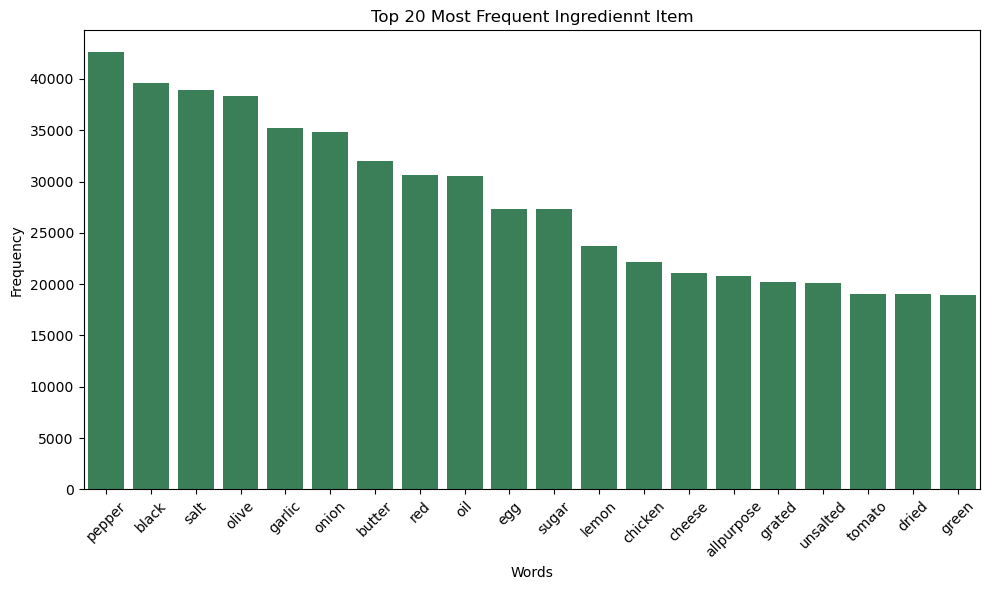

In [48]:
# Top N most frequent words to display
top_n = 20

# Get the top N words and their frequencies
top_words = list(sorted_word_freq.keys())[:top_n]
top_freq = list(sorted_word_freq.values())[:top_n]

plt.figure(figsize=(10,6))
sns.barplot(x=top_words, y=top_freq, color='seagreen')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Ingrediennt Item'.format(top_n))
plt.tight_layout()
plt.show()

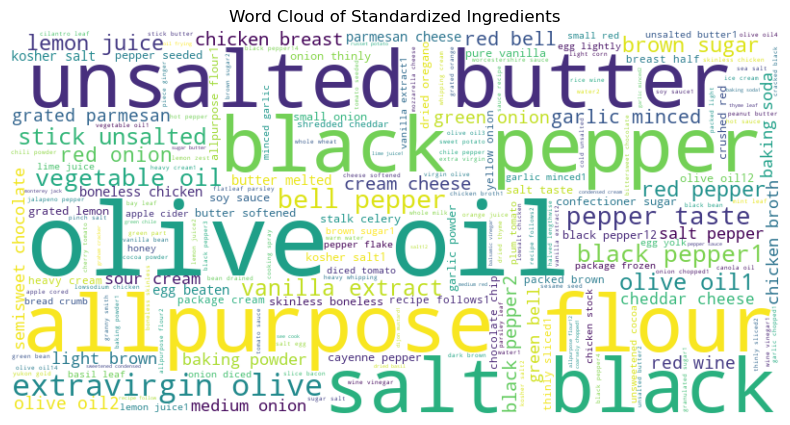

In [49]:
from wordcloud import WordCloud
# Concatenate all the standardized ingredients into a single text
text_data = " ".join(standardized_ingredients)
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Standardized Ingredients')
plt.show()

#### Recipes with maximum number of ingredients

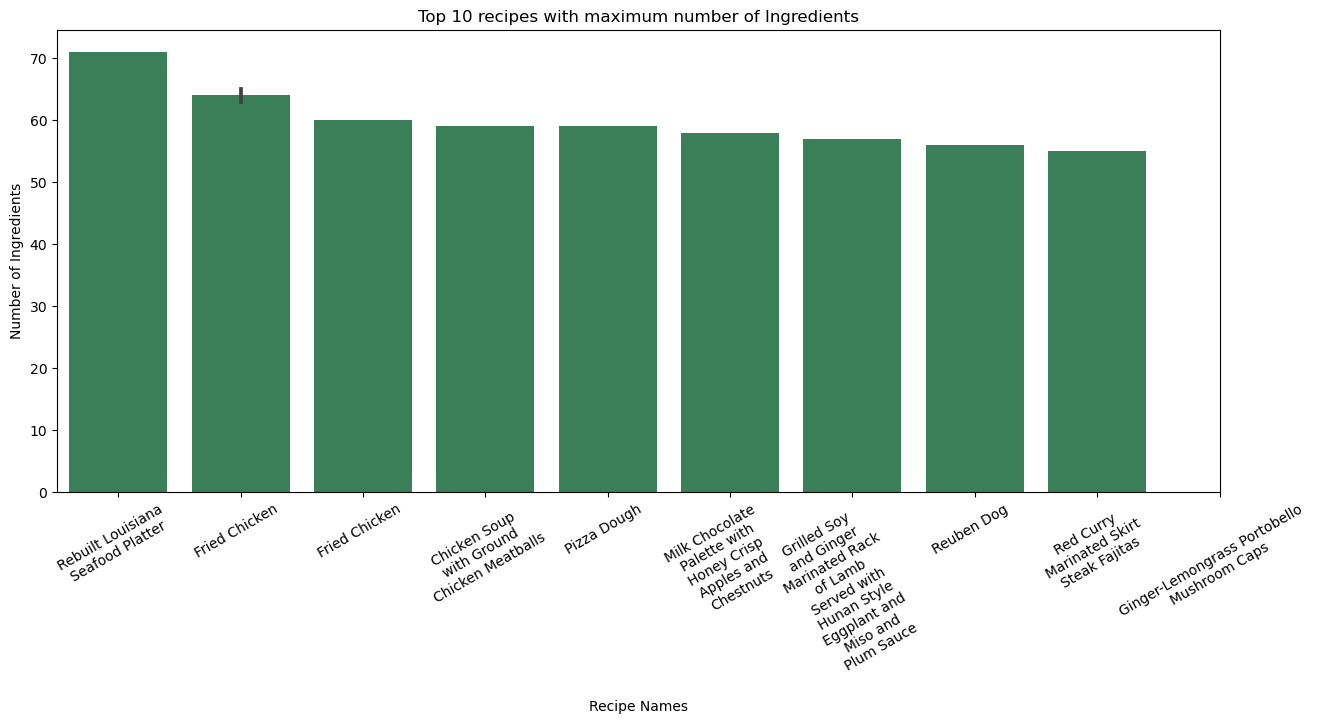

In [50]:
#function to wrap xaxix tick names
#Add new line after three words
def wrap_text(sentence):
    a=sentence.split()
    n=2
    ret= ''
    for i in range(0, len(a), n):
         ret += ' '.join(a[i:i+n]) + '\n'
    return ret
df_plot=df_clean[['title', 'ingredient_item']].sort_values(by='ingredient_item', ascending=False).head(10)
df_plot['wrapped_text']=df_plot['title'].apply(lambda x: wrap_text(x))
plt.figure(figsize=(15,6))
sns.barplot(data=df_plot,
            x='title', y='ingredient_item', color='seagreen')
plt.xlabel('Recipe Names')
plt.ylabel('Number of Ingredients')
plt.xticks(range(0,len(df_plot.index)), df_plot['wrapped_text'].values, rotation=30)
plt.title('Top 10 recipes with maximum number of Ingredients')
plt.show()

#### Combining all text data and standardizig it

Okay, now I am planning to add all text from `title`, `instructions` and `ingredient_item` together so that the search algorithm to find the recommended recipes could make better search even if user knows just the recipe name or a few of the ingredients.

In [51]:
all_text=df_clean['title']+ ' '+df_clean['items']+' '+df_clean['instructions']

In [52]:
cleaned_ver=standardize_text(all_text)

In [53]:
# df_all.info()
df_all=pd.DataFrame(cleaned_ver)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121836 entries, 0 to 121835
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       121836 non-null  object
dtypes: object(1)
memory usage: 952.0+ KB


In [54]:
df_all=df_all.rename(columns={0: 'combined_text'})

### Recommendation using text similarity

#### Implementing TFIDF Vectorization and Cosine Similarity

Let us start with TFIDF vectorization to convert text into numerical representation and then we will implement recommender logic using cosine similarity.
Later on we can try working with word2vec and topic modelling to experiment and learn which approach gives the most relevant recipes.

In [55]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121836 entries, 0 to 121835
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   combined_text  121836 non-null  object
dtypes: object(1)
memory usage: 952.0+ KB


In [56]:
df_all.head(2)

,combined_text
0,slow cooker chicken dumpling onion diced butter skinless boneless chicken breast half condensed cream chicken soup package refrigerated biscuit dough torn piece place chicken butter soup onion slow cooker fill enough water cover cover cook hour high minute serving place torn biscuit dough slow cooker cook dough longer raw center
1,awesome slow cooker pot roast pot roast package onion soup mix condensed cream mushroom soup water slow cooker mix cream mushroom soup onion soup mix water place pot roast slow cooker coat soup mixture cook high setting hour low setting hour


In [57]:
combined_text= df_all['combined_text'].tolist()

In [58]:
# combined_text=cleaned_ver
combined_text[15238]

'nutella® coffee shake chocolatehazelnut spread nutella® instant coffee granule milk sugar ice cube vanilla extract blend ice milk sugar chocolatehazelnut spread instant coffee vanilla extract together blender desired consistency reached second'

In [59]:
combined_text[706]

'eclair cake milk container frozen whipped topping thawed package graham cracker square package prepared chocolate frosting package instant vanilla pudding mix medium bowl thoroughly blend pudding mix whipped topping milk arrange single layer graham cracker square bottom 13x9 baking pan evenly spread half pudding mixture cracker top another layer cracker remaining pudding mixture top final layer graham cracker spread frosting whole cake edge pan cover chill least hour serving'

There are some tokens like 13X9, 12X10inch, 1/2, 160deg F etc which are not removed so we can try two approchaes to get rid of them.
1. We can adjust min_df=5 to see if these tokens are removed during TFIDF vectorization
2. We can remove these by using regex matching.



In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase= True, min_df=5)

# Apply TF-IDF vectorization to the combined text
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

In [61]:
tfidf_words = tfidf_vectorizer.get_feature_names_out()
print(tfidf_matrix.shape)
print(len(tfidf_words))

(121836, 24456)
24456


In [62]:
tfidf_words[100:800]

array(['12cup', '12cupful', '12cupfuls', '12cups', '12diameter', '12full',
       '12g', '12gallon', '12hole', '12in', '12inch', '12inch1',
       '12inch2', '12inch4', '12inchdeep', '12inchdiameter',
       '12inchdiced', '12inches', '12inchhigh', '12inchlong',
       '12inchround', '12inchsquare', '12inchthick', '12inchwide',
       '12kosher', '12lb', '12long', '12muffin', '12ounce', '12ounces',
       '12oz', '12pint', '12pound', '12pounds', '12qt', '12quart',
       '12tablespoon', '12teaspoon', '12teaspoons', '12thick', '12to',
       '12to2inch', '12tsp', '12wide', '12x1', '12x10', '12x10inch',
       '12x12', '12x12inch', '12x15', '12x15inch', '12x16', '12x18',
       '12x18inch', '12x18inches', '12x1inch', '12x2', '12x3', '12x4',
       '12x5inch', '12x6', '12x7inch', '12x8', '12x8inch', '12x9',
       '12x9inch', '13', '130', '1325ounce', '135', '135ounce',
       '138ounce', '13by', '13by18inch', '13by9by2inch', '13by9inch',
       '13cup', '13g', '13inch', '13inches', '13in

Okay, so it seems that we were not able to remove this pattern completely. Also, there are some words with number preceeding measurement like - 4pound', '4pounds', '4quart', '4rib', '4serving',
       '4sided', '4th', '4to', '4to5pound', '4x12'

In [63]:
def find_items_with_patterns(item_list, pattern):
    matching_items = []
    for item in item_list:
        if re.search(pattern, item):
            matching_items.append(item)
    return matching_items

# Regular expression pattern to match patterns like "13by30inch"
pattern = r'\d+(?:\/\d+)?(?:[a-z°°]+)?'

# Find items with numbers or patterns
matching_items = find_items_with_patterns(combined_text, pattern)


In [64]:
matching_items[99]

'french baguette egg yolk bread machine yeast sugar water water salt bread flour place water bread flour sugar salt yeast bread machine pan order recommended manufacturer select dough cycle press start cycle ha completed place dough greased bowl turning coat side cover let rise warm place minute doubled bulk dough ready indentation remains touched punch dough lightly floured surface roll 16x12 rectangle dough half creating two 8x12 rectangle roll half dough tightly beginning side pounding air bubble go roll gently back forth taper end place apart greased cookie sheet make deep diagonal slash across loaf every make one lengthwise slash loaf cover let rise warm place minute doubled bulk preheat oven degree f degree c mix egg yolk water brush top loaf bake minute preheated oven golden brown'

In [65]:
def custom_tokenizer(text):
    tokens = text.split()
    tokens= [re.sub(r'\d+$', '', token) for token in tokens]
    # Filter out measurement patterns
    tokens= [token for token in tokens if not re.match(r'^\d+[A-Za-z]+\d+$', token)]
    filtered_tokens = [token for token in tokens if not re.match(r'\d+(?:\/\d+)?(?:[a-z°°]+)?', token)]

    return filtered_tokens


from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, lowercase= True, max_features=50000)

# Apply TF-IDF vectorization to the combined text
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

In [66]:

tfidf_words = tfidf_vectorizer.get_feature_names_out()
print(tfidf_matrix.shape)
print(len(tfidf_words))

(121836, 50000)
50000


In [67]:
tfidf_words[100:900]

array(['accomplished', 'according', 'accordingly', 'accordion',
       'accordionstyle', 'account', 'accoutrement', 'accra', 'accumulate',
       'accumulated', 'accumulates', 'accumulating', 'accuracy',
       'accurate', 'accurately', 'acetate', 'aceto', 'ach', 'achieve',
       'achieved', 'achieves', 'achieving', 'achilleos', 'achiote',
       'achioteinfused', 'acid', 'acidic', 'acidity', 'acidophilus',
       'acidsweet', 'acidulate', 'acidulated', 'acinus', 'ackee', 'acme',
       'acorn', 'acqua', 'acquire', 'acquired', 'acquires', 'acras',
       'acre', 'acrid', 'across', 'act', 'acting', 'action', 'activa',
       'activate', 'activated', 'activates', 'active', 'activedry',
       'actively', 'activity', 'actual', 'actually', 'ad', 'ada', 'adam',
       'adams®', 'adapt', 'adaptable', 'adaptation', 'adapted', 'add',
       'added', 'addicting', 'addiction', 'addictive', 'addin', 'adding',
       'addins', 'addition', 'additional', 'additionally',
       'additions—the', 'add

#### User input vectorization using TF-IDF

In [68]:
# Example user input (replace this with actual user input after preprocessing)
user_input = "ground beef, pasta, spaghetti, tomato sauce, bacon, onion, zucchini, and, cheese"

#### Finding recipes using Cosine Similarity

In [69]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Function to calculate cosine similarity between a user input vector and recipe vectors
def calculate_similarity(user_input_vector, recipe_matrix):
    return cosine_similarity(user_input_vector, recipe_matrix)

def find_recipes(user_input):
    
    # Generate the user input vector using the TFIDF model
    user_input_vector = tfidf_vectorizer.transform([user_input])

    # Calculate similarity between user input vector and recipe vectors
    similarities = calculate_similarity(user_input_vector, tfidf_matrix )
    return similarities

similarities=find_recipes(user_input)

In [70]:
# np.argsort(similarities)

In [71]:
# np.where(df_clean.index== 79928)

In [72]:
#resetting index from df_clean since we dropped some rows while preprocessing
df_clean = df_clean.reset_index(drop=True)

In [73]:
# Sort the recipes based on similarity and get top N recommendations
top_n = 5
top_indices = np.argsort(similarities[0])[::-1][:top_n]
top_recipes = [df_clean['title'][i] for i in top_indices]

print(f"Top {top_n} Recipe Recommendations:")
for i, recipe in enumerate(top_recipes, 1):
    print(f"{i}. {recipe}")

Top 5 Recipe Recommendations:
1. Ravenswood Rub
2. Spice-Rubbed American Bison Tenderloin
3. Cardamom-Stewed Chickpea and Tomato Ragout
4. Rudy Mikeska's "All Purpose" Seasoning Rub
5. Champagne Cheddar Spread


In [74]:
#printing out 
df_clean.loc[top_indices, ['title', 'items', 'instructions']]

,title,items,instructions
102372,Ravenswood Rub,"3/4 teaspoon ground black pepper;1 tablespoon kosher salt;1 1/2 teaspoons dried oregano;3/4 teaspoon fennel seed, toasted and ground;1/2 teaspoon mustard seed, toasted and ground;1/4 teaspoon sugar;1/8 teaspoon ground ginger;3/4 teaspoon chili powder;1/4 teaspoon cayenne pepper;1 1/2 teaspoons onion powder;2 1/4 teaspoons garlic powder;1/2 teaspoon cumin seed, toasted and ground;1 1/2 teaspoons dried thyme;1 1/2 teaspoons paprika",Combine all ingredients in a bowl and mix well. Apply this rub mixture on baby back ribs before grilling.
70649,Spice-Rubbed American Bison Tenderloin,"2 teaspoons red chile powder;1/2 teaspoon allspice, ground;1 teaspoon black peppercorns, freshly ground;1 tablespoon salt;2 teaspoons coriander seeds, toasted and ground;1/4 cup paprika;4 (8-ounce) bison tenderloin fillets;2 teaspoons cumin seed, toasted and ground;1 tablespoon sugar;1 whole chipotle pepper in adobo, seeded or 1 teaspoon ground dried chipotles",Combine spices and set aside. Heat grill pan or grill to medium-high heat. Place spice on a pie pan or large flat plate and dip both sides of each steak into mixture and shake off excess. Place steak on grill or grill pan and lower heat if using a grill pan or the spices will burn. Grill for 4 to 5 minutes each side. Remove from grill and let rest a couple of minutes before serving.
89682,Cardamom-Stewed Chickpea and Tomato Ragout,"1 large onion, diced;1/2 teaspoon turmeric powder;1/2 teaspoon cumin seeds, toasted and ground;1/2 teaspoon coriander seeds, toasted and ground;1 (15-ounce) can chickpeas, drained and rinsed;Salt and pepper, to taste;1/2 cup cilantro, chopped;1/4 cup lemon juice;2 large tomatoes, peeled, seeded, and chopped;1 large jalapeno, seeded and chopped;6 cardamom pods, toasted and ground;1/2 cup peanut oil","Heat a heavy-bottom saucepan over a medium flame. Add oil and onion, cook until translucent. Add cardamom, coriander, cumin, and turmeric, stir for 1 minute. Add jalapenos, tomatoes, and chickpeas; simmer for 20 minutes, season with salt and pepper to taste. Add lime juice and cilantro. Serve warm or at room temperature.;"
80290,"Rudy Mikeska's ""All Purpose"" Seasoning Rub","4 ounces chili powder;3 ounces black pepper, coarsely ground;3 ounces black pepper, finely ground;1 pound salt;2 ounces hot paprika;2 ounces garlic powder","Mix all ingredients together and place in an airtight container. Rub on beef, pork, chicken, lamb (anything) generously and marinate 1 to 5 days, refrigerated, before cooking."
79923,Champagne Cheddar Spread,"1/2 teaspoon McCormick® Nutmeg, Ground;1 pound Cheddar cheese, cut into 1-inch chunks;1/8 teaspoon McCormick® Red Pepper, Ground;4 ounces (1/2 package) cream cheese, softened;1/2 cup Champagne;1 teaspoon McCormick® Parsley Flakes","1. Place all ingredients in food processor; cover. Process until smooth. Spoon into serving bowl. Cover.\n2. Refrigerate at least 2 hours to allow flavors to blend. Let stand at room temperature to soften slightly. Serve with assorted cut-up vegetables, crackers or French bread slices."


#### Implementing Word2Vec Embedding

Since we observed that some of the patterns where not removed even after standardization and therefore we will remove these patterns before we implement word2Vec.

Later we will build the word2vec model on our recipe corpora and use it to transform user input data. Later using cosine similarity will try to find the top five recommended recipes.

In [75]:
# Let us remove the words/tokens from our text before feeding it to word2vec model.
def remove_patterns(list_text):
    text_wo_pattern_lst=[]
    for text in list_text:
        tokens = text.split()
        tokens= [re.sub(r'\d+$', '', token) for token in tokens]
        # Filter out measurement patterns
        tokens= [token for token in tokens if not re.match(r'^\d+[A-Za-z]+\d+$', token)]
        filtered_tokens = [token for token in tokens if not re.match(r'\d+(?:\/\d+)?(?:[a-z°°]+)?', token)]

        filtered_text=" ".join(filtered_tokens)
        text_wo_pattern_lst.append(filtered_text)
    
    return text_wo_pattern_lst

In [76]:
clean_text_lst=remove_patterns(combined_text)

In [77]:
len(clean_text_lst)

121836

In [78]:
import gensim
from gensim.models import Word2Vec

# all_tokens=word_tokenize(cleaned_ver)
all_tokens=[]
for i in clean_text_lst:
    all_tokens.append(word_tokenize(i))

# Train Word2Vec model
w2v_model = Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=1, workers=4)

In [79]:
w2v_model.wv['fillet']

array([ 1.4261752 ,  1.8587061 , -2.6358416 , -2.6735425 , -1.0092748 ,
        1.9810276 ,  4.736305  , -0.04541181, -0.02152561, -0.01119359,
       -2.8067858 ,  0.16694383, -0.08501514,  0.6720226 , -1.8263608 ,
       -2.6023772 ,  1.0338534 , -3.7318203 , -1.257943  , -0.29999974,
       -3.431556  ,  0.20702873,  1.9864664 ,  2.548867  , -1.5174484 ,
       -1.2529712 ,  0.10994935,  1.9436098 ,  0.43957523, -3.840997  ,
        3.3529916 ,  2.2988331 ,  2.733348  , -0.65608984,  1.6240606 ,
       -2.0495136 , -1.9197835 ,  0.4533821 ,  2.1539109 ,  1.6806502 ,
        0.6386323 , -0.08451545, -3.7761102 ,  4.3182936 ,  2.467707  ,
        1.6653317 , -1.1532713 ,  1.000709  ,  0.39791998,  2.0590827 ,
        0.8741871 , -0.16157408,  1.8834256 ,  0.04827137,  1.7593396 ,
        2.394779  ,  2.4741302 ,  0.5141193 , -2.121016  , -0.30658287,
        0.7016727 , -3.463952  , -1.4024767 ,  1.3681971 ,  0.3205938 ,
        0.48067853,  2.0588822 ,  1.7910763 , -4.2872896 , -4.02

In [80]:
len(all_tokens)

121836

In [81]:
w2v_model.wv.most_similar('beef')

[('chuck', 0.6745345592498779),
 ('venison', 0.6639471054077148),
 ('pork', 0.6634148955345154),
 ('brisket', 0.629707396030426),
 ('bison', 0.6239053010940552),
 ('veal', 0.6218824982643127),
 ('sirloin', 0.5987210273742676),
 ('oxtail', 0.5980250239372253),
 ('meat', 0.5845324993133545),
 ('chicken', 0.5712569355964661)]

In [82]:
len(w2v_model.wv.index_to_key)

90539

In [83]:
# Generate user input vector
user_input = "ground beef, pasta, spaghetti, tomato sauce, bacon, onion, zucchini, and, cheese"
# user_input = standardize_text(user_input)
user_input_tokens = word_tokenize(user_input)

# Initialize an empty user input vector
user_input_vector = [0] * w2v_model.vector_size

# Calculate the mean vector of the user input tokens
num_tokens = 0
for token in user_input_tokens:
    if token in w2v_model.wv:
        user_input_vector = [a + b for a, b in zip(user_input_vector, w2v_model.wv[token])]
        num_tokens += 1

if num_tokens > 0:
    user_input_vector = [x / num_tokens for x in user_input_vector]



In [84]:
recipe_vector=[0]*w2v_model.vector_size
all_recipes_vector=[]
for i in all_tokens:
   # Calculate the mean vector of the each recipe
    num_tokens = 0 
    for token in i:
        if token in w2v_model.wv:
            recipe_vector = [a + b for a, b in zip(recipe_vector, w2v_model.wv[token])]
            num_tokens += 1

    if num_tokens > 0:
        recipe_vector = [x / num_tokens for x in recipe_vector]
    all_recipes_vector.append(recipe_vector)

In [85]:
all_recipes_vector=np.array(all_recipes_vector)

In [86]:
user_input_vector = np.array(user_input_vector).reshape(1, -1)
# Calculate cosine similarity between user input and all recipes
similarities2 = cosine_similarity(user_input_vector, all_recipes_vector)

# Recommend top recipes
# Get the indices of top N similar recipes
N = 5  # Number of recipes to recommend
top_indices2 = similarities2.argsort()[0][-N:][::-1]

# Print the top N recommended recipes
for idx in top_indices2:
    print(df_clean['title'][idx])

Spicy Pizza Soup
Nadine's - Na's Pasta
Nadine's - Na's Pasta
Cavatini I
Contadina® Garden Vegetable Pasta Bake


In [87]:
df_clean.loc[top_indices2, ['title', 'items', 'instructions']]

,title,items,instructions
11157,Spicy Pizza Soup,"4 cups water ;3 green bell peppers, chopped ;1 (15 ounce) can tomato sauce ;1 1/2 cups uncooked elbow macaroni ;2 cups shredded mozzarella cheese ;1 3/8 pounds hot Italian sausage, sliced ;2 cups chopped fresh mushrooms ;3 cups crushed tomatoes with garlic ;1 (6 ounce) can tomato paste ;;1 pound pepperoni sausage, sliced ;2 onions, chopped","In a large saucepan, place the hot Italian sausage, pepperoni sausage, green bell peppers, onions, mushrooms, diced tomatoes, tomato sauce, tomato paste and water. Bring to a boil. Boil 30 minutes, reduce heat and simmer 90 minutes.\nDuring the final 15 minutes of cooking, stir in the elbow macaroni.\nTop with mozzarella and serve.\n"
104509,Nadine's - Na's Pasta,"1 1/2 pounds trio pasta (combination of shells, fusilli and penne rigate);3 tomatoes, diced;1 1/2 pounds bulk hot Italian sausage;1 onion, chopped;3 red peppers, chopped;Three 1-inch-thick slices salami, cubed;Grated Asiago cheese, for garnish;Garlic bread or Italian butter bread, for serving;Salt and pepper;Three 1-inch-thick slices capicolla, cubed;3 cups marinara sauce","Saute the hot Italian sausage and drain off all of the fat. Add the sausage, salami, capicolla, tomatoes, onion and red peppers to the saute pan and mix well. Add salt and pepper, to taste.\nPreheat the oven to 350 degrees F.\nCook the pasta in boiling water until al dente. Drain and set aside.\nIn a large oven-safe dish, combine the pasta, sausage mixture and marinara sauce. Cover and bake for 30 minutes.\nPlate and top with fresh Asiago cheese. Serve with garlic bread or Italian butter bread."
118411,Nadine's - Na's Pasta,"1 1/2 pounds trio pasta (combination of shells, fusilli and penne rigate);3 tomatoes, diced;1 onion, chopped;3 red peppers, chopped;Three 1-inch-thick slices salami, cubed;Salt and pepper;Grated Asiago cheese, for garnish;Garlic bread or Italian butter bread, for serving;1 1/2 pounds bulk hot Italian sausage;Three 1-inch-thick slices capicolla, cubed;3 cups marinara sauce","Saute the hot Italian sausage and drain off all of the fat. Add the sausage, salami, capicolla, tomatoes, onion and red peppers to the saute pan and mix well. Add salt and pepper, to taste.\nPreheat the oven to 350 degrees F.\nCook the pasta in boiling water until al dente. Drain and set aside.\nIn a large oven-safe dish, combine the pasta, sausage mixture and marinara sauce. Cover and bake for 30 minutes.\nPlate and top with fresh Asiago cheese. Serve with garlic bread or Italian butter bread."
11163,Cavatini I,"2 (4.5 ounce) cans sliced mushrooms, drained ;2 pounds lean ground beef ;1 (15 ounce) can tomato sauce ;3 ounces sliced pepperoni sausage ;2 pounds mozzarella cheese, shredded ;2 tablespoons grated Parmesan cheese ;ground black pepper to taste ;1 green bell pepper, chopped ;1 (32 ounce) jar spaghetti sauce ;1/4 cup butter ;4 ounces chopped ham ;;salt to taste ;3/4 cup seashell pasta ;1/4 teaspoon crushed red pepper flakes ;6 ounces rotini pasta ;1 onion, chopped ;1/2 cup cooked and cubed chicken","In a small skillet, saute onions, green peppers, and mushrooms in butter or margarine. Set aside.\nBrown hamburger in a large skillet over medium heat. Drain. Mix in tomato sauce, pasta sauce, chopped ham, chopped chicken or turkey, pepperoni, salt, and red and black pepper. Add vegetable saute to hamburger mixture.\nCook pasta according to package directions. Drain.\nSpread a little sauce over the bottom of two 9 x 13 inch pans. In each pan, place a layer of pasta, a layer of mozarella cheese, a hamburger sauce layer, a sprinkling of Parmesan cheese, and another layer of mozarella cheese. Repeat layers. Cover pans.\nBake at 350 degrees F (175 degrees C) for 30 to 45 minutes.\n"
25466,Contadina® Garden Vegetable Pasta Bake,"1 cup coarsely chopped onion ;1 red bell pepper, cut in 1-inch pieces ;2 carrots, sliced ;2 teaspoons dried basil ;1 (28 ounce) can CONTADINA® Tomato Puree ;1/4 cup chopped Italian parsley, divided 

## Recommendation based on Topic Modeling

### Topic modeling using Gensim based LDA on BOW

Iniotially, I am going ahead with modelling arbitary 10 topics and later will use grid search to find the optimal number of topics.

In [88]:
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
from gensim import similarities

# Step 1: Prepare the Recipe Data


tokenized_recipes=[]
for i in clean_text_lst:
    tokenized_recipes.append(word_tokenize(i))

# Step 2: Create a Gensim Dictionary
dictionary = corpora.Dictionary(tokenized_recipes)

# Step 3: Create a Gensim Corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_recipes]

# Step 4: Train the LDA Model

num_topics = 10  # Specify the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)



In [89]:
# Step 5: Transform User Input
user_input = "ground beef, pasta, spaghetti, tomato sauce, bacon, onion, zucchini, cheese"
user_input_tokens = [token for token in standardize_text(user_input)]
user_input_bow = dictionary.doc2bow(user_input_tokens)

# Step 6: Get Topic Distribution for User Input
user_topic_distribution = lda_model[user_input_bow]

# Step 7: Recommend Recipes
# Calculate similarity scores between user_topic_distribution and recipe topic distributions
index = similarities.MatrixSimilarity(lda_model[corpus])
sims = index[user_topic_distribution]

# Sort recipes by similarity scores
sorted_recipes = sorted(enumerate(sims), key=lambda item: -item[1])

# Get the top recommended recipes
top_recipes = sorted_recipes[:5]

# Print the top recommended recipe indices
print(top_recipes)

[(31649, 0.9945042), (83736, 0.9920445), (83427, 0.9904824), (65630, 0.9864439), (100045, 0.9859897)]


In [90]:
top_recipes_index=[i[0] for i  in top_recipes]
top_recipes_index

[31649, 83736, 83427, 65630, 100045]

In [91]:
top_recipes = [df_clean['title'][i] for i in top_recipes_index]

print(f"Top {top_n} Recipe Recommendations:")
for i, recipe in enumerate(top_recipes, 1):
    print(f"{i}. {recipe}")

Top 5 Recipe Recommendations:
1. Extreme Veggie Scrambled Eggs
2. Thyme-Scented Goat Cheese with Prosciutto and Shallots
3. Turkey Meatballs with Chipotle Cream Sauce
4. Queso Fundido
5. Queso Fundido


In [92]:
df_clean.iloc[top_recipes_index]

,title,instructions,ingredient_item,items,recipe_words
31649,Extreme Veggie Scrambled Eggs,"Heat olive oil in a large skillet over medium-high heat; cook and stir black beans, onion, and green bell pepper until onion is translucent, 5 to 10 minutes.\nBeat eggs and milk together in a bowl; add to vegetable mixture and stir in tomatoes. Cook egg mixture until eggs are set, about 5 minutes. Mix Cheddar cheese into egg mixture.\n",9,1/4 cup shredded Cheddar cheese ;1/4 cup chopped fresh tomato ;;1/4 cup drained canned black beans ;1/4 cup milk ;6 eggs ;1/4 cup chopped onion ;1/4 cup chopped green bell pepper ;1/4 cup olive oil,60
83736,Thyme-Scented Goat Cheese with Prosciutto and Shallots,"1. In small skillet heat oil over medium-high heat. Add shallots. Cook for 3 to 4 minutes or until browned. Add vinegar. Cook, uncovered, about 30 seconds or until slightly reduced. Set aside.\n2. In small bowl combine goat cheese, milk, thyme, salt and pepper. Stir until soft and creamy.\n3. Place one folded piece of prosciutto on each KEEBLER TOWN HOUSE Original cracker. Spoon about 1 teaspoon of goat cheese mixture on each. Top each with some of the shallot mixture.",10,"4 thin slices prosciutto, crosswise cut into 1 1/2-inch-wide strips (about 3 oz. total);1/4 teaspoon freshly ground black pepper;1 1/2 teaspoons chopped fresh thyme;2 teaspoons olive oil;24 Keebler® Town House® Original crackers;1/4 teaspoon kosher salt;2 large shallots, finely chopped (about 3/4 cup);1 tablespoon milk;1 tablespoon balsamic vinegar;4 ounces goat cheese, softened",82
83427,Turkey Meatballs with Chipotle Cream Sauce,"Heat the meatballs according to the package instructions.\nMeanwhile, combine the sour cream, milk, mayonnaise, garlic powder and chipotle in a blender and blend until combined. Add salt and pepper to taste and blend again.\nIn a small saucepan, heat the butter over low heat until melted. Add the chipotle mixture and mix with a wooden spoon until combined. Heat until warm, then serve with the meatballs and garnish with the grated Parmesan and cilantro.",10,1/4 cup grated Parmesan;1 teaspoon garlic powder;About 32 frozen turkey meatballs;2 chipotle peppers in adobo sauce;3 tablespoons chopped fresh cilantro;Kosher salt and freshly ground black pepper;2 cups sour cream;4 tablespoons (1/2 stick) unsalted butter;1 tablespoon mayonnaise;1/4 cup milk,75
65630,Queso Fundido,Bring the wine to a simmer in a double boiler. Add the mozzarella and Jack cheese and stir until melted. Add the remaining ingredients and cook for 5 minutes. Place in a fondue pot and serve with flour tortillas and blue corn chips.,8,"2 poblano peppers, roasted, peeled, seeded and finely chopped;6 cloves roasted garlic, smashed to a paste;1/2 pound mozzarella cheese, grated;1/2 pound Monterey Jack, grated;1 cup white wine;Salt and freshly ground pepper;1/2 pound goat cheese crumbled;1/4 pound Spanish chorizo, grilled and finely diced",43
100045,Queso Fundido,Bring the wine to a simmer in a double boiler. Add the mozzarella and jack cheeses and stir until melted. Add the remaining ingredients and cook for 5 minutes. Place in a fondue pot and serve with flour tortillas and blue corn chips.,10,"Flour tortillas, for serving;2 poblano peppers, roasted, peeled, seeded and finely chopped;6 cloves roasted garlic, smashed to a paste;1 cup white wine;Blue corn tortilla chips, for serving;Salt and freshly ground pepper;1/2 pound goat cheese crumbled;1/2 pound Monterey jack, grated;1/4 pound Spanish chorizo, grilled and finely diced;1/2 pound mozzarella, grated",43


In [93]:
lda_model.show_topics(formatted=False)

[(0,
  [('juice', 0.06795754),
   ('lemon', 0.06658965),
   ('orange', 0.03961975),
   ('zest', 0.028513875),
   ('lime', 0.023350775),
   ('garnish', 0.019891614),
   ('glass', 0.018512122),
   ('sugar', 0.018069759),
   ('mint', 0.018030558),
   ('ice', 0.017516702)]),
 (1,
  [('cream', 0.03376457),
   ('sugar', 0.0287361),
   ('chocolate', 0.025390591),
   ('mixture', 0.01665934),
   ('bowl', 0.01615468),
   ('cake', 0.015396053),
   ('vanilla', 0.015288107),
   ('heat', 0.013727822),
   ('pan', 0.0113818105),
   ('minute', 0.0110403905)]),
 (2,
  [('chicken', 0.067169495),
   ('pan', 0.025191167),
   ('oven', 0.022785354),
   ('minute', 0.017986279),
   ('pork', 0.017961638),
   ('salt', 0.017627753),
   ('degree', 0.016588835),
   ('pepper', 0.016234234),
   ('meat', 0.015975049),
   ('f', 0.013712879)]),
 (3,
  [('cheese', 0.055293437),
   ('bread', 0.03386366),
   ('oven', 0.028705714),
   ('slice', 0.02358642),
   ('top', 0.022189157),
   ('egg', 0.020328669),
   ('minute', 0.0

#### Using grid search and coherence score to find optimal number of topics

In [115]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values_lda_model(dictionary, corpus, texts, limit, start=2, step=6):
    coherence_values_lda = []
    model_list_lda = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       chunksize=2000,
                                       alpha='auto',
                                       eta='auto',
                                       iterations=400,
                                       passes=20,
                                       eval_every=None)
        print(num_topics)
        model_list_lda.append(lda_model)
        coherencemodel_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_lda.append(coherencemodel_lda.get_coherence())

    return model_list_lda, coherence_values_lda

In [116]:

model_list_lda, coherence_values_lda = compute_coherence_values_lda_model(dictionary=dictionary,corpus=corpus, texts=tokenized_recipes, start=10, limit=50, step=10)

10
20
30
40


In [117]:
model_list_lda, coherence_values_lda

([<gensim.models.ldamodel.LdaModel at 0x1e8a88ee990>,
 [0.5476523451238817,
  0.5129429362974092,
  0.5101261008199807,
  0.5086503085862033])

Lets us visualize and see how the coherence score is varying.

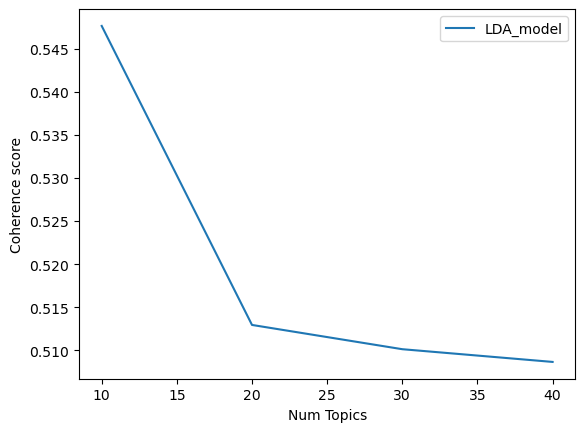

In [119]:
%matplotlib inline
# Show graph
limit=50; start=10; step=10;
x = range(start, limit, step)
y_lda = coherence_values_lda

plt.plot(x, y_lda, label='LDA_model')
    
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")    
plt.legend()
plt.savefig('model_lda_coherence_score.png')
plt.show()

Clearly, we can see that there is a decreasing trend and score is highest for 10 number of topics.

In [120]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_lda):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 10  has Coherence Value of 0.5477
Num Topics = 20  has Coherence Value of 0.5129
Num Topics = 30  has Coherence Value of 0.5101
Num Topics = 40  has Coherence Value of 0.5087


The optimal model of LDA using BOW corpus is the one with higher coherence score:

In [122]:
optimal_model_lda = model_list_lda[0]

optimal_model_lda.show_topics()

[(0,
  '0.032*"chicken" + 0.022*"oil" + 0.021*"sauce" + 0.021*"grill" + 0.019*"minute" + 0.019*"pepper" + 0.019*"side" + 0.018*"pan" + 0.016*"salt" + 0.013*"place"'),
 (1,
  '0.037*"sugar" + 0.026*"butter" + 0.024*"cream" + 0.022*"chocolate" + 0.020*"egg" + 0.020*"flour" + 0.020*"baking" + 0.020*"bowl" + 0.017*"vanilla" + 0.017*"cake"'),
 (2,
  '0.036*"onion" + 0.035*"pepper" + 0.029*"rice" + 0.023*"bean" + 0.022*"garlic" + 0.022*"sauce" + 0.021*"cilantro" + 0.020*"chile" + 0.018*"powder" + 0.018*"tomato"'),
 (3,
  '0.047*"sugar" + 0.040*"juice" + 0.032*"lemon" + 0.030*"orange" + 0.023*"apple" + 0.016*"glass" + 0.016*"garnish" + 0.015*"zest" + 0.015*"combine" + 0.014*"mint"'),
 (4,
  '0.023*"dough" + 0.015*"place" + 0.013*"water" + 0.013*"bowl" + 0.012*"flour" + 0.012*"ice" + 0.011*"make" + 0.010*"roll" + 0.010*"using" + 0.009*"minute"'),
 (5,
  '0.062*"egg" + 0.044*"bacon" + 0.037*"heat" + 0.035*"oil" + 0.033*"paper" + 0.028*"towel" + 0.026*"fry" + 0.023*"slice" + 0.022*"skillet" + 0.

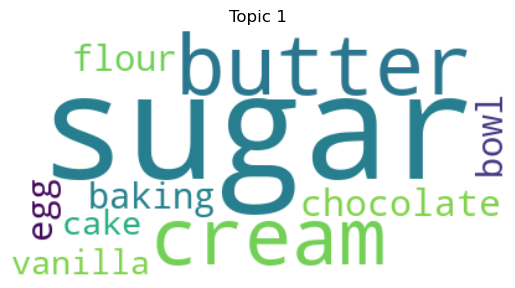

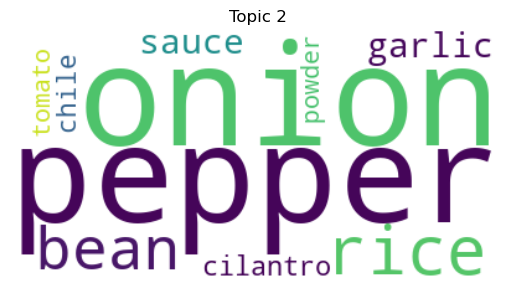

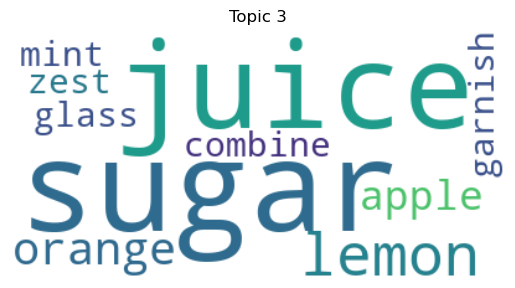

In [125]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()
    
 #visualize the first 3 topics for LDA with BOW corpus
for i in range(1,4):
    create_wordcloud(optimal_model_lda, topic=i)


In [127]:
# Step 5: Transform User Input
user_input = "ground beef, pasta, spaghetti, tomato sauce, bacon, onion, zucchini, cheese"
user_input_tokens = [token for token in standardize_text(user_input)]
user_input_bow = dictionary.doc2bow(user_input_tokens)

# Step 6: Get Topic Distribution for User Input
user_topic_distribution = optimal_model_lda[user_input_bow]

# Step 7: Recommend Recipes
# Calculate similarity scores between user_topic_distribution and recipe topic distributions
index = similarities.MatrixSimilarity(optimal_model_lda[corpus])
sims = index[user_topic_distribution]

# Sort recipes by similarity scores
sorted_recipes = sorted(enumerate(sims), key=lambda item: -item[1])

# Get the top recommended recipes
top_recipes = sorted_recipes[:5]

# Print the top recommended recipe indices
print(top_recipes)

[(49450, 0.9971546), (117385, 0.99286354), (66799, 0.9923301), (53794, 0.99090147), (11403, 0.9905148)]


In [128]:
top_recipes = [df_clean['title'][i] for i in top_recipes_index]

print(f"Top {top_n} Recipe Recommendations:")
for i, recipe in enumerate(top_recipes, 1):
    print(f"{i}. {recipe}")

Top 5 Recipe Recommendations:
1. Butter Green Onion and Sour Cream Spread
2. Spicy Pumpkin Seeds
3. Sweet, Spicy and Salty Candied Nut Mix
4. Easy Savory Oatmeal for One
5. Vegan Vegetable Muffins


In [129]:
df_clean.iloc[top_recipes_index]

,title,instructions,ingredient_item,items,recipe_words
116618,Butter Green Onion and Sour Cream Spread,Mix all ingredients and then refrigerate butter mixture to serve with tortillas.,5,"1 bunch green onions, finely chopped;1 cup sour cream;1 pound butter, room temperature;1 pinch salt;1 teaspoon granulated garlic",12
92599,Spicy Pumpkin Seeds,"Watch how to make this recipe.\nPreheat oven to 350 degrees F.\nPlace the pumpkin seeds in a large bowl and toss with the oil, ancho powder, salt, and chile de arbol powder. Spread evenly on a baking sheet and bake for 8 to 10 minutes, stirring once. Let cool and store in an airtight container.",5,3 cups pumpkin seeds;1 tablespoon kosher salt;1 1/2 tablespoons ancho chili powder;2 tablespoons canola oil;1 teaspoon chile de arbol powder,56
94759,"Sweet, Spicy and Salty Candied Nut Mix","Melt the butter and sugar in a large skillet over medium heat and add the salt. Add the almonds, cashews, peanuts, pecans, chili powder, cinnamon, cumin and cayenne. Cook until the sugar is melted and the nuts are fragrant, 5 to 6 minutes. Add the rosemary and toss. Immediately spread the nut mixture on a parchment-lined baking sheet. Cool completely, and then serve.",12,"1/4 teaspoon ground cinnamon;2 tablespoons unsalted butter;1/2 teaspoon kosher salt;2 tablespoons brown sugar;1/4 teaspoon ground cumin;1/2 cup blanched whole almonds;1/2 cup whole cashews;1/2 cup whole pecans;1 tablespoon fresh rosemary leaves, roughly chopped;1/8 teaspoon cayenne pepper;1/2 cup roasted, unsalted peanuts;1/4 teaspoon chili powder",63
38479,Easy Savory Oatmeal for One,"Mix water, oats, and a dash of salt together in a microwave-safe bowl. Microwave on 50% power until oatmeal is chewy and tender, about 5 minutes. Stir. Mix in butter, seasoning blend, salt, and pepper. Let stand for 1 minute before serving.\n",7,";1 teaspoon butter, or more to taste ;salt and ground black pepper to taste ;1 cup water ;1/2 cup old-fashioned oats ;1/8 teaspoon seasoning blend (such as Vegeta®), or more to taste ;1 dash salt",42
28657,Vegan Vegetable Muffins,"Preheat oven to 375 degrees F (190 degrees C). Grease 12 muffin cups or line with paper liners.\nWhisk flour, cornmeal, baking soda, baking powder, chili powder, oregano, and salt together in a large bowl. Stir carrots, tomatoes, celery, and garlic into flour mixture.\nWhisk tomato soup and olive oil together in a separate bowl; stir into flour mixture until batter is just combined. Spoon batter into prepared muffin cups. Sprinkle each muffin with black pepper.\nBake in the preheated oven until lightly browned, about 15 minutes.\n",15,"1/2 cup finely chopped celery ;1 (10.75 ounce) can tomato soup ;;4 teaspoons baking powder ;2 teaspoons salt ;3/4 cup cornmeal ;ground black pepper to taste ;1 1/2 cups chopped tomatoes ;2 tablespoons baking soda ;1/4 cup olive oil ;2 1/2 cups whole wheat flour ;1 clove garlic, pressed ;2 teaspoons chili powder ;1 1/2 cups grated carrots ;2 teaspoons dried oregano",87


#### Conclusion

Since we don't have a labelled data our model is unsupervised and hence evaluation materics is not there. However from observing the result and comparing the models we found that only **Word2Vec gave out the relevant recipes.**

Later I would like to make a streamlit app that users can use and play around.

#### Playing around with Word2Vec model

In [100]:
user_input='chicken, spinach'

In [96]:
#vectorize user input as per Word2Vec Model

def user_input_vectorize(word2vec_model, user_input):
    
    user_input_tokens = word_tokenize(user_input)

    # Initialize an empty user input vector
    user_input_vector = [0] * word2vec_model.vector_size

    # Calculate the mean vector of the user input tokens
    num_tokens = 0
    for token in user_input_tokens:
        if token in word2vec_model.wv:
            user_input_vector = [a + b for a, b in zip(user_input_vector, word2vec_model.wv[token])]
            num_tokens += 1

    if num_tokens > 0:
        user_input_vector = [x / num_tokens for x in user_input_vector]
    
    return user_input_vector

def recommend_w2v(user_input_vector):
    user_input_vector = np.array(user_input_vector).reshape(1, -1)
    # Calculate cosine similarity between user input and all recipes
    similarities2 = cosine_similarity(user_input_vector, all_recipes_vector)

    # Recommend top recipes
    
    N = 5  # Number of recipes to recommend
    top_indices2 = similarities2.argsort()[0][-N:][::-1]
    
    return top_indices2


In [101]:
indices=recommend_w2v(user_input_vectorize(w2v_model , user_input))

In [102]:
# Print the top N recommended recipes
for idx in indices:
    print(df_clean['title'][idx])


Baked Chicken with Mushrooms and Artichokes 
Chicken with Artichoke Pesto and Braised Kale with Pink Beans and Ham
Chicken Rice Soup
Greek Spinach-Stuffed Chicken
Chicken, Sweet Potato and Spinach Soup


In [105]:
df_clean.loc[indices, ['title', 'items', 'instructions']]

,title,items,instructions
55951,Baked Chicken with Mushrooms and Artichokes,"8 ounces mushrooms, sliced;1 6-ounce jar marinated artichoke hearts;5 green onions, chopped;4 chicken breast halves;Salt and pepper;1 cup dry white wine","Preheat oven to 350°F. Season chicken breast halves with salt and pepper. Place skin side up in 9x13-inch baking dish. Drain artichokes, reserving marinade. Cut artichoke in half. Top chicken breasts with artichokes, mushrooms and green onions. Pour reserved marinade and white wine over. Bake until chicken is cooked through. about 45 minutes.\nPreheat oven to 350°F. Season chicken breast halves with salt and pepper. Place skin side up in 9x13-inch baking dish. Drain artichokes, reserving marinade. Cut artichoke in half. Top chicken breasts with artichokes, mushrooms and green onions. Pour reserved marinade and white wine over. Bake until chicken is cooked through. about 45 minutes."
77762,Chicken with Artichoke Pesto and Braised Kale with Pink Beans and Ham,"Salt and freshly ground black pepper;2 tablespoons grated Pecorino Romano or Parmesan;1 cup diced lean baked ham;2 teaspoons olive oil;2 tablespoons olive oil;1/2 cup reduced-sodium chicken broth;2 cloves garlic, peeled;1 (15-ounce) can pink beans, rinsed and drained;1 (14-ounce) can water-packed artichoke hearts, drained;1 tablespoon salt-free lemon and herb seasoning;1 packed cup basil leaves;1 pound kale, chopped;1/2 cup reduced-sodium chicken broth, or more as needed;4 (4-ounce) boneless skinless chicken breast halves","Watch how to make this recipe.\nHeat oil in a large skillet over medium heat. Season chicken all over with salt and black pepper. Season with lemon and herb seasoning. Place in hot pan and cook 3 to 4 minutes per side, until cooked through.\nMeanwhile, in a blender, combine artichoke hearts, basil, garlic, 1/2 cup chicken broth, oil and cheese. Process until smooth, adding more broth, if necessary, to create a thick sauce. Transfer chicken to a serving platter and top with pesto.\nTo make kale: Heat oil in a large skillet over medium heat. Add ham and cook 2 minutes, until golden brown. Add kale, beans and broth, cover and steam 5 minutes, until kale is tender. Season, to taste, with salt and black pepper. Serve kale alongside chicken."
22808,Chicken Rice Soup,"1/4 teaspoon ground black pepper ;7 cups chicken broth ;1 cup frozen French-cut green beans ;1 onion, quartered ;3/4 (8 ounce) package cream cheese ;3 skinless, boneless chicken breast halves ;2 stalks celery, chopped ;2/3 cup converted rice (such as Uncle Ben's®) ;1/2 teaspoon salt ;;1 cup chopped carrots ;1 small turnip, chopped","Bring chicken broth, chicken breasts, onion, carrots, turnip, and celery to a boil in a large pot until chicken is no longer pink in the center, about 20 minutes. Season with salt and pepper. Remove chicken from broth; strain and discard vegetables. Add green beans and rice; continue to simmer until rice is tender, about 20 minutes more.\nCut chicken into chunks. Stir chicken and cream cheese into broth until cheese is melted, about 5 minutes.\n"
83666,Greek Spinach-Stuffed Chicken,"3 1/2 cups chopped baby spinach (about 8 ounces);2 tablespoons finely chopped sun-dried tomatoes;8 ounces ditalini (about 1 3/4 cups);1/4 cup crumbled low-fat feta cheese;1 cup low-sodium chicken broth;2 tablespoons white wine vinegar;2 tablespoons extra-virgin olive oil;1 tablespoon chopped fresh mint;Kosher salt and freshly ground pepper;3 skinless, boneless chicken breasts (8 to 10 ounces each), trimmed","Combine 2 cups spinach, the feta and 3 tablespoons water in a bowl. Insert a paring knife into the thickest part of each chicken breast, cutting along the side to make a deep 2-inch-wide pocket. Stuff the spinach mixture into the pockets. Heat a large nonstick skillet over medium heat and add the olive oil. Season the chicken with salt and pepper. Add to the skillet, rounded-side down, and cook until browned, about 3 minutes per side. Add the chicken broth, 

In [106]:
user_input='zuchinni, carrot, lamb meat, wheat flour, onion'

In [107]:
indices=recommend_w2v(user_input_vectorize(w2v_model , user_input))
# Print the top N recommended recipes
for idx in indices:
    print(df_clean['title'][idx])

Hearty Beef Stew
Slow Cooker Italian Beef Stew
Slow Cooker Beef Stew I
Beef Roast with Root Vegetables
Slow-Cooker Pork Stew


In [108]:
df_clean.loc[indices, ['title', 'items', 'instructions']]

,title,items,instructions
4618,Hearty Beef Stew,"1 stalk celery, sliced ;1 pound cubed beef stew meat ;1/4 cup all-purpose flour ;1 1/2 tablespoons teriyaki sauce ;salt and pepper to taste ;;1 tablespoon paprika ;2 cups beef broth ;2 cloves garlic, minced ;3 carrots, sliced ;1 onion, chopped ;1 bay leaf ;1/2 pound mushrooms, quartered ;2 potatoes, cubed","Place beef stew meat into a slow cooker. In a small bowl, mix together flour, paprika, salt, and pepper; sprinkle over beef stew meat, stirring to coat. Stir in beef broth, teriyaki sauce, onion, carrots, celery, potatoes, mushrooms, garlic and bay leaf.\nCover, and cook on Low 6 hours, stirring occasionally.\n"
17850,Slow Cooker Italian Beef Stew,"1/2 yellow onion, quartered and sliced ;3/4 cup red wine ;1/4 teaspoon onion powder, or more to taste ;1/4 cup tomato paste ;2 cloves garlic, chopped ;salt and ground black pepper to taste ;;1 1/2 pounds cubed beef stew meat ;1 tablespoon vegetable oil ;4 red potatoes, quartered ;1 teaspoon dried rosemary ;1/4 cup beef broth ;2 stalks celery, roughly chopped ;1/4 cup all-purpose flour, or as needed ;1/2 (16 ounce) package baby carrots, quartered ;1/4 teaspoon garlic powder, or to taste","Whisk flour, onion powder, garlic powder, salt, and pepper together in a shallow bowl. Add beef to seasoned flour and toss to evenly coat; shake off any excess flour.\nHeat oil in a skillet over medium heat. Cook beef in hot oil until browned on all sides, 5 to 10 minutes. Transfer beef to slow cooker; add carrots, onion, potatoes, celery, and garlic.\nWhisk red wine, beef broth, tomato paste, and rosemary together in a bowl until smooth; pour over beef and vegetables.\nCook on Low until beef and vegetables are tender, 4 to 6 hours.\n"
69,Slow Cooker Beef Stew I,"4 carrots, sliced ;3 potatoes, diced ;1 1/2 cups beef broth ;2 pounds beef stew meat, cut into 1 inch cubes ;1 teaspoon paprika ;1/2 teaspoon ground black pepper ;1/4 cup all-purpose flour ;1 teaspoon Worcestershire sauce ;1 stalk celery, chopped ;;1/2 teaspoon salt ;1 bay leaf ;1 onion, chopped ;1 clove garlic, minced","Place meat in slow cooker. In a small bowl mix together the flour, salt, and pepper; pour over meat, and stir to coat meat with flour mixture. Stir in the garlic, bay leaf, paprika, Worcestershire sauce, onion, beef broth, potatoes, carrots, and celery.\nCover, and cook on Low setting for 10 to 12 hours, or on High setting for 4 to 6 hours.\n"
68148,Beef Roast with Root Vegetables,"1 celery root (celeriac), peeled and chopped;1 teaspoon onion powder;1 teaspoon ground cumin;1/3 cup maple syrup;2 parsnips, peeled and chopped;2 teaspoons chili powder;3 tablespoons all-purpose flour;Salt and ground black pepper;1 teaspoon garlic powder;1/2 cup chopped onion;1 (14-ounce) can diced tomatoes;1 (5-pound) boneless beef roast, trimmed of fat;2 large sweet potatoes, cut into 2-inch pieces","Watch how to make this recipe.\nArrange onion, sweet potatoes, parsnips and celery root in bottom of slow cooker. Season beef all over with salt and black pepper. Rub flour all over beef. Place roast on top of vegetables in slow cooker.\nWhisk together tomatoes, maple syrup, chili powder, cumin, garlic powder, and onion powder. Pour mixture over beef.\nCover and cook on LOW for 12 hours or on HIGH for 8 hours.\nRemove beef from slow cooker and shred with 2 forks. Serve 1/3 of shredded beef with this meal (and all of the vegetables) and refrigerate remaining beef for another use."
66441,Slow-Cooker Pork Stew,"1 pound fingerling potatoes;3 carrots, cut into 2-inch chunks;1 14-ounce can diced tomatoes;1 bone-in pork shoulder or pork sirloin roast (2 to 2 1/2 pounds);1/2 teaspoon ground allspice;2 stalks celery, cut into 2-inch chunks;1 2-inch piece ginger, peeled and grated;1/3 cup all-purpose flour;1 teaspoon dried thyme;3 cloves garlic, smashed;Kosher salt and freshly ground pepper;3 bay leaves","Combine the potatoes, carrots, celery, garlic and ginger in a slow cooker. Toss in half of the flour an

Given that our current constraints of not having labels or user feedback, we are stopping here. However, there are a few aspects to consider and if possible I would like to implement in future:

- Evaluation Metrics: We could compare the average cosine scores of the different approaches we employed in our project but I am stopping here since the result of LDA based model appeared very inaccurate. A higher average similarity score generally indicates better recommendations.

- User Engagement: Monitor user engagement with the recommender system. Track metrics such as the number of clicks on recommended recipes, the time spent on recipe pages, and the number of interactions with the recommendations. These metrics can provide insights into how well your system is performing in the absence of explicit user feedback.

- Tuning Hyperparameters: Experiment with different hyperparameters in your recommendation models (e.g., number of topics in LDA, TF-IDF vectorization settings) to see if they impact the quality of recommendations. Already tried tuning the number of topics on LDA but tuned on a limited set as it was taking a long run time.

- User Surveys: Although we don't have explicit feedback, we can conduct user surveys or collect feedback through user interviews to gather qualitative information about their satisfaction with the recommendations.
